In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Analysis using 3 Clusters

In [3]:
df=pd.read_csv("C:/Users/ASUS/Desktop/Harvard/leila_survey/complete_codes/data/clusters_3_construction.csv")
# delete some specific repeated columns
df.drop(["tr_part","tr_eligibility","tr_part_exp"], axis=1, inplace=True)
df.head()

f_size_n  f_hq_na  f_mne  f_mne_us  f_mne_nonus  f_sub_asia  f_sub_africa  \
0       2.0      1.0    0.0       0.0          0.0         0.0           0.0   
1       5.0      1.0    1.0       1.0          0.0         0.0           0.0   
2       4.0      1.0    0.0       0.0          0.0         0.0           0.0   
3       2.0      1.0    0.0       0.0          0.0         0.0           0.0   
4       2.0      1.0    1.0       1.0          0.0         0.0           0.0   

   f_sub_northamerica  f_sub_southamerica  f_sub_europe  ...  \
0                 0.0                 0.0           0.0  ...   
1                 1.0                 0.0           0.0  ...   
2                 0.0                 0.0           0.0  ...   
3                 0.0                 0.0           0.0  ...   
4                 1.0                 0.0           0.0  ...   

   sk_gapcertainty_Not confident at all  sk_gapcertainty_Not very confident  \
0                                 False                               False   
1                                 False                               False   
2                                 False                               False   
3                                 False                               False   
4                                 False                               False   

   sk_gapcertainty_Somewhat confident  sk_gapcertainty_Very confident  \
0                                True                           False   
1                               False                            True   
2                                True                           False   
3                               False                           False   
4                               False                            True   

   sk_gapcertainty_Completely certain  tr_clusplot2_Digital+Cognitive  \
0                               False                           False   
1                               False                            True   
2                               False                           False   
3                                True                           False   
4                               False                           False   

   tr_clusplot2_Everything  tr_clusplot2_Soft  tr_clusplot2_Digital+Soft  \
0                    False               True                      False   
1                    False              False                      False   
2                    False               True                      False   
3                     True              False                      False   
4                    False               True                      False   

   KMeans_Cluster  
0               0  
1               1  
2               2  
3               0  
4               0  

[5 rows x 758 columns]

### Anova

In [5]:
groups = df['KMeans_Cluster'].unique()

# Dictionary to store p-values
p_values = {}

# Perform ANOVA for each variable
for column in df.columns:
    if column != 'KMeans_Cluster':
        # Extract data for each group
        group_data = [df[df['KMeans_Cluster'] == group][column] for group in groups]
        
        # Perform ANOVA
        f_statistic, p_value = f_oneway(*group_data)
        
        # Store p-value
        p_values[column] = p_value

# Convert results to a DataFrame
p_values_df = pd.DataFrame(list(p_values.items()), columns=['Variable', 'p_value'])


alpha = 0.05

significant_vars = p_values_df[p_values_df['p_value'] < alpha]

top_vars = significant_vars.sort_values('p_value').head(20)

print(significant_vars)

C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


                               Variable   p_value
19                       hr_internalmkt  0.015053
22                          l_outsource  0.026737
29                  p_year_start_clone2  0.004409
30                    p_year_end_clone2  0.004117
31                            p_ongoing  0.000604
..                                  ...       ...
744                clusplot2_Everything  0.004157
745                      clusplot2_Soft  0.008669
746           clusplot2_Soft + Industry  0.000037
752  sk_gapcertainty_Completely certain  0.044476
754             tr_clusplot2_Everything  0.000896

[231 rows x 2 columns]


In [7]:
top_vars

Variable       p_value
58                        p_part  2.516019e-45
57                 p_eligibility  1.550760e-32
59                    p_part_exp  2.419217e-31
34                    p_fund_org  1.613259e-21
35                    p_fund_wrk  1.052121e-07
33                    p_fund_gov  2.519150e-07
159            tr_sk_n_f_finance  8.944476e-07
84                 inc_wrk_strat  9.936602e-07
704              mot_mgragg_Easy  1.502473e-06
696                 mot_mgr_Easy  5.023032e-06
296                       presp2  7.090108e-06
630     p_responsibility_hier_HR  7.090108e-06
623  p_responsibility_HR Leaders  7.090108e-06
293                    p_resp_hr  7.090108e-06
37                  p_fund_other  8.710532e-06
36                  p_fund_union  1.348870e-05
127             sk_n_dig_advance  1.951182e-05
707              mot_wrkagg_Easy  3.084554e-05
140                        clus4  3.180315e-05
145                        clus5  3.180315e-05

In [9]:
def plot_density_for_significant_vars(df, group_col, significant_vars, alpha=0.05):

    # Check if the group column exists in the DataFrame
    if group_col not in df.columns:
        raise ValueError(f"Group column '{group_col}' not found in DataFrame.")
    
    # Check if significant_vars is empty
    if not significant_vars:
        raise ValueError("No significant variables provided.")
    
    # Create a density plot for each significant variable
    for var in significant_vars:
        if var not in df.columns:
            print(f"Variable '{var}' not found in DataFrame.")
            continue
        
        plt.figure(figsize=(8, 6))
        g = sns.FacetGrid(df, hue=group_col, height=6, aspect=1.5)
        g.map(sns.kdeplot, var, fill=True, palette="Set2", common_norm=False)
        g.set_titles(f'Density Plot for {var}')
        g.set_axis_labels(var, 'Density')
        g.add_legend(title=group_col, title_fontsize='13', fontsize='11')
        
        plt.show()


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

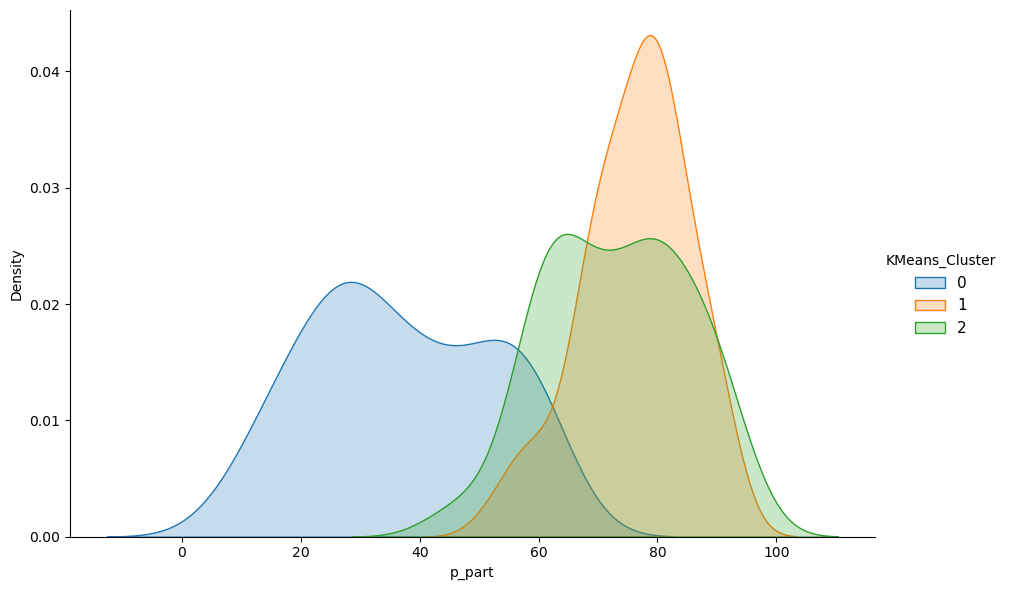

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

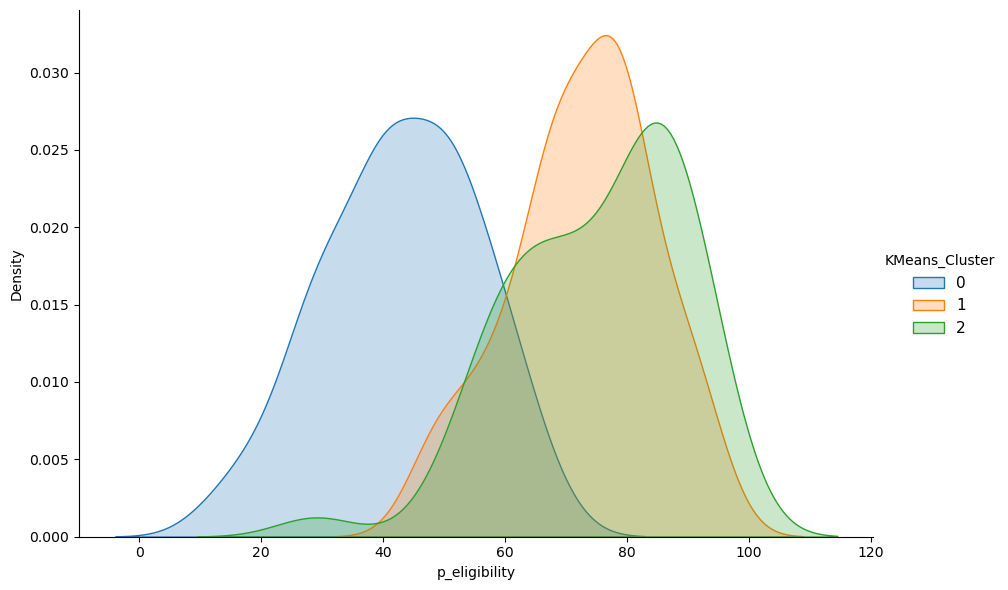

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

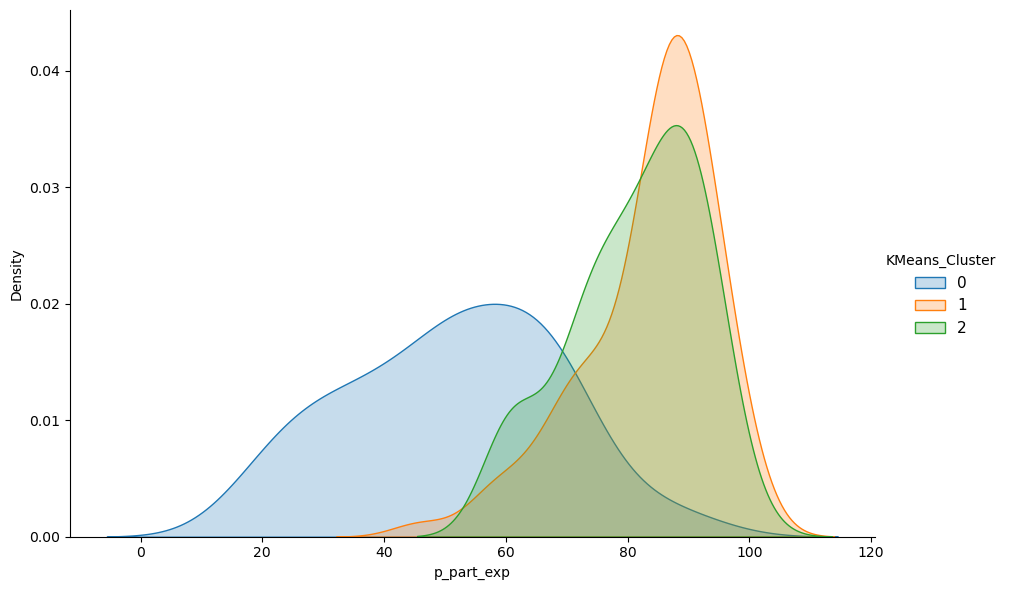

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

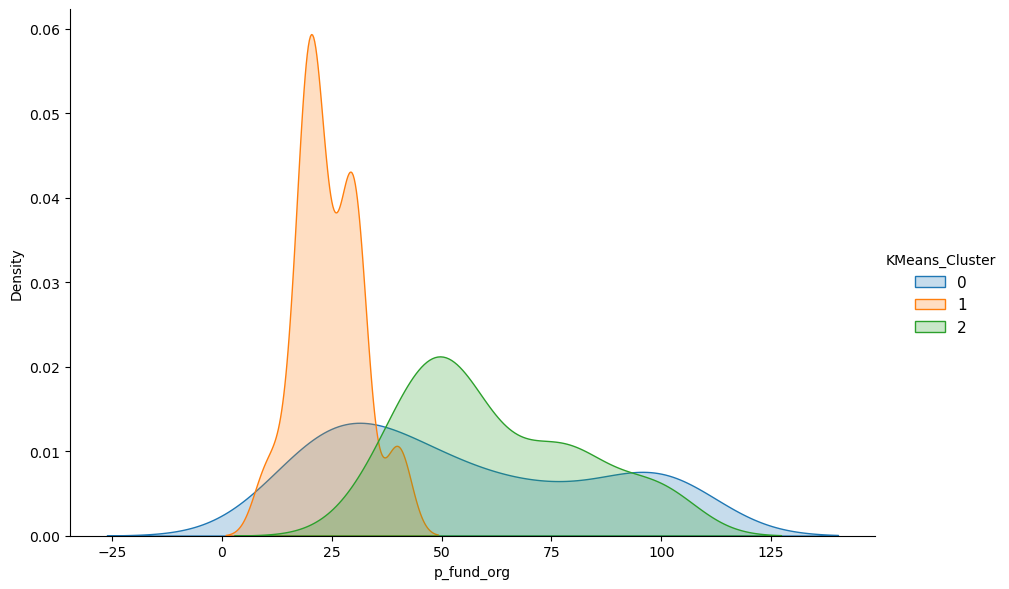

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

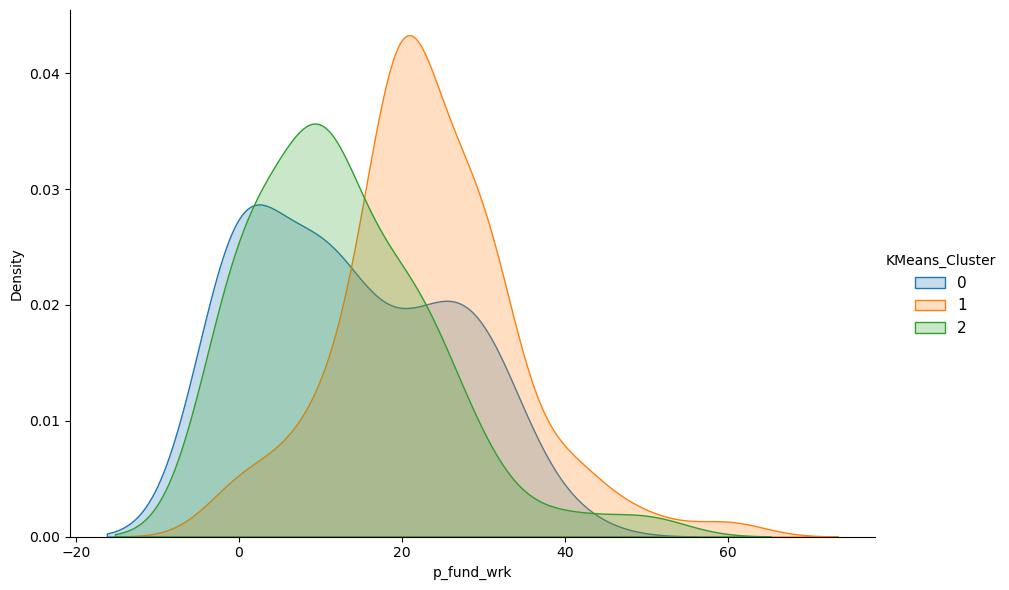

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

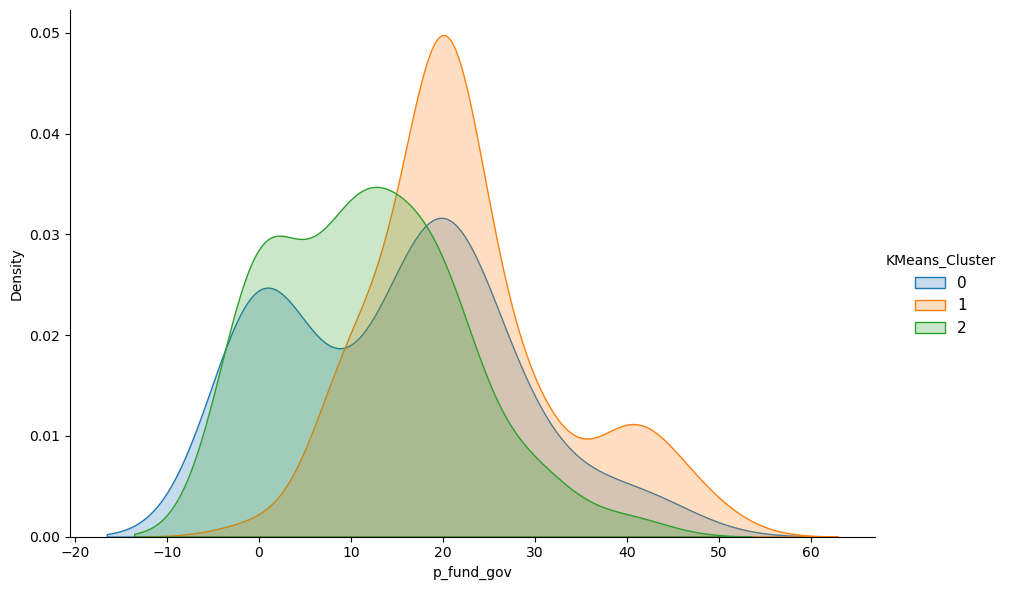

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

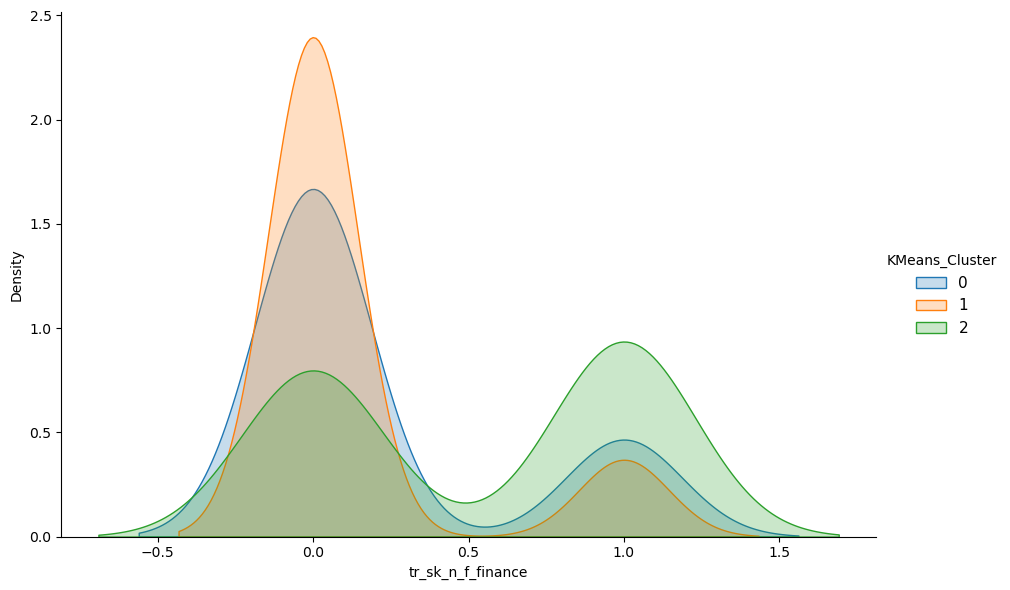

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

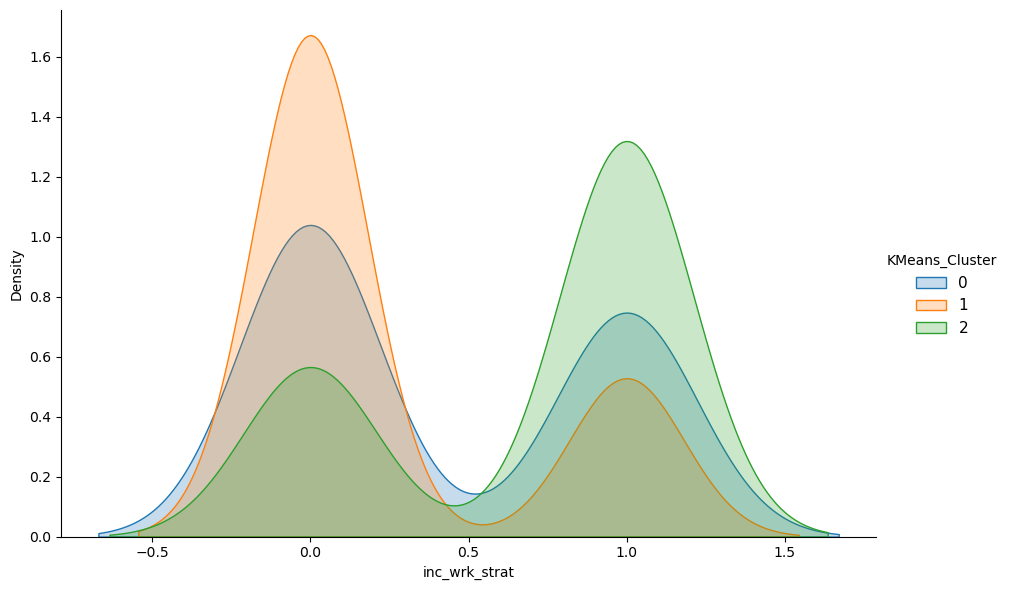

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

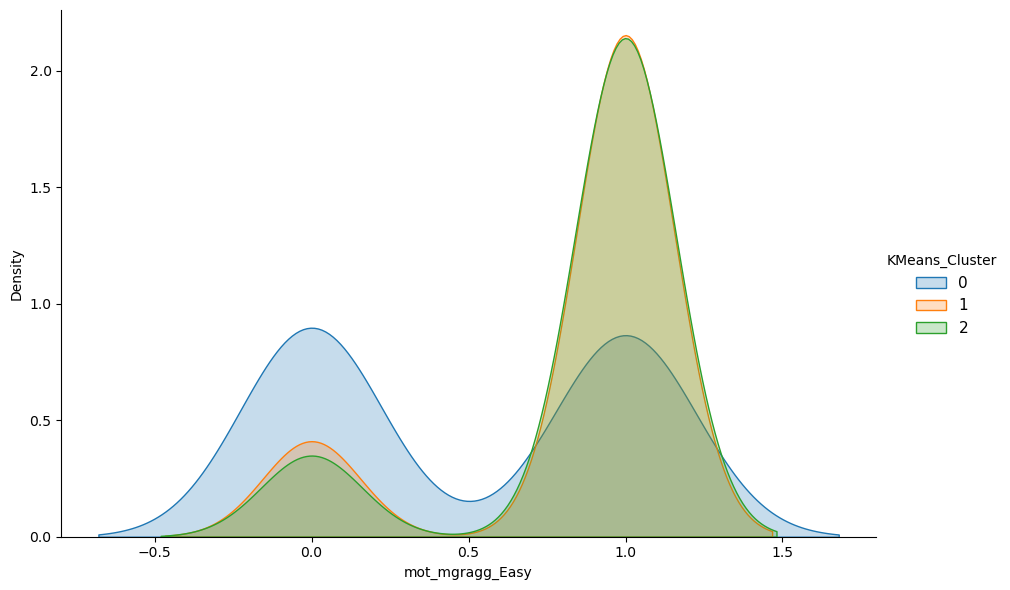

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

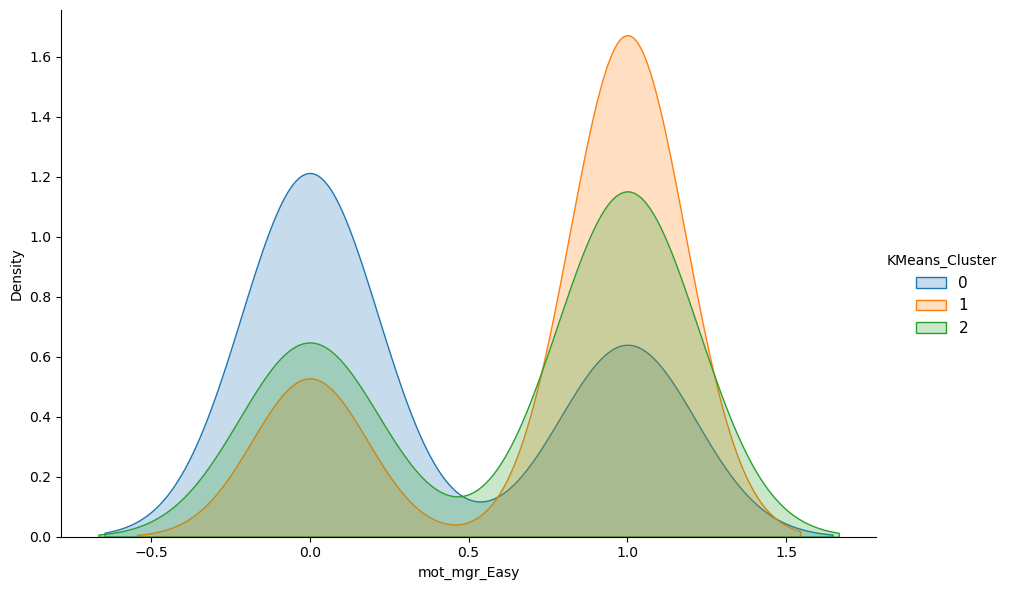

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

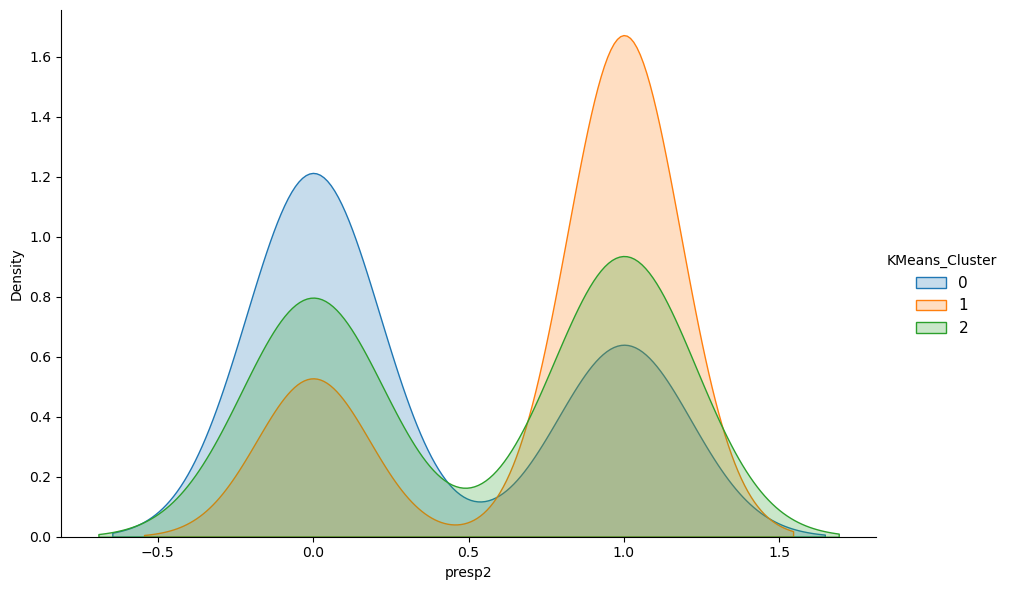

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

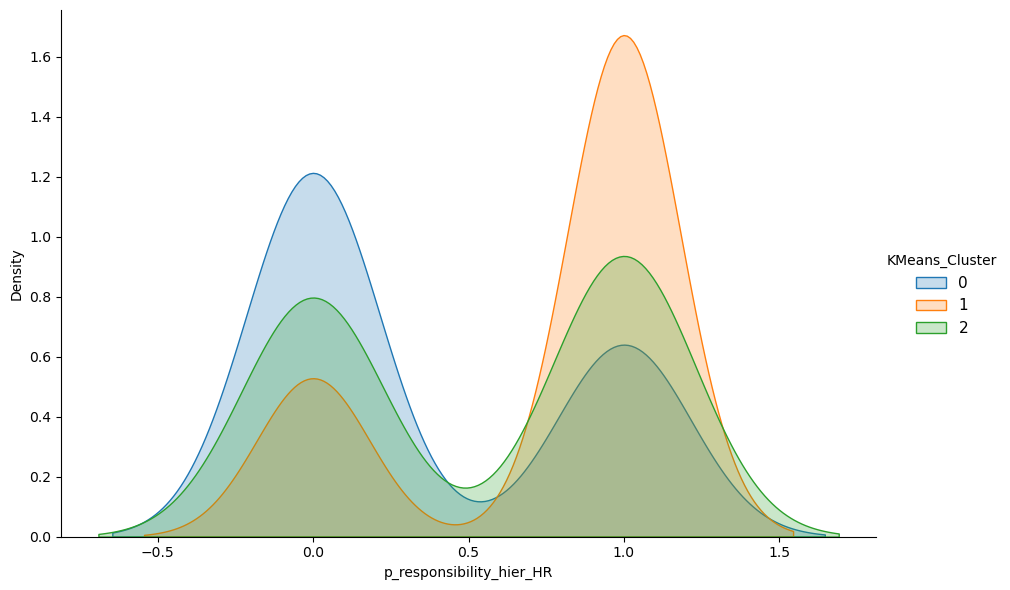

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

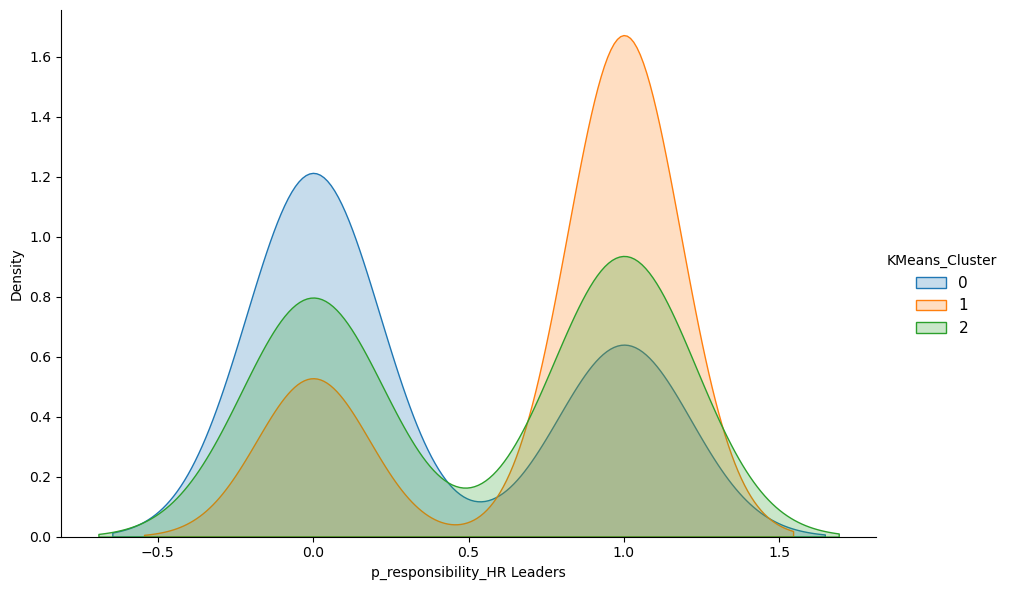

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

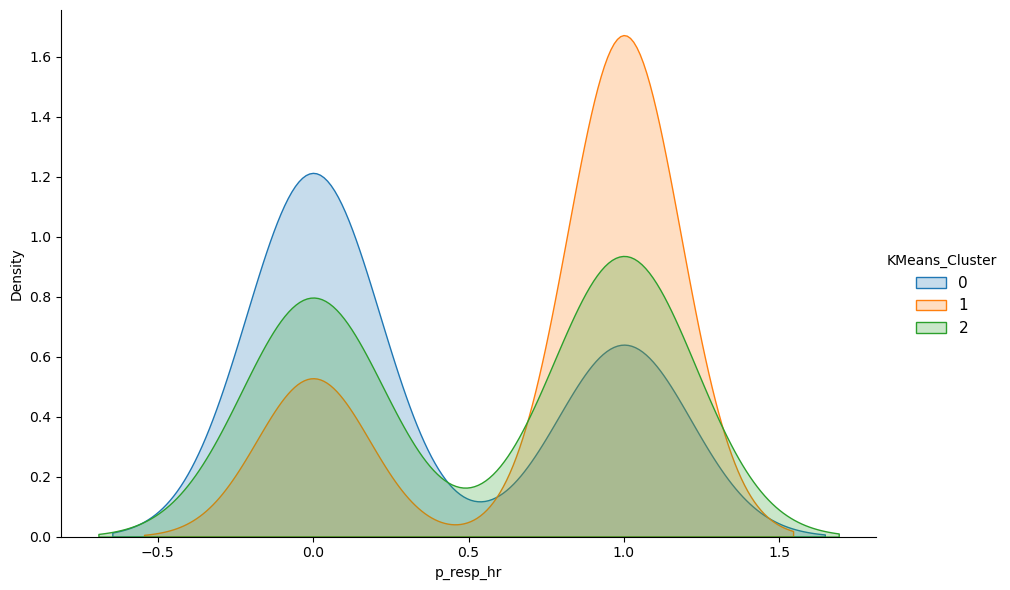

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

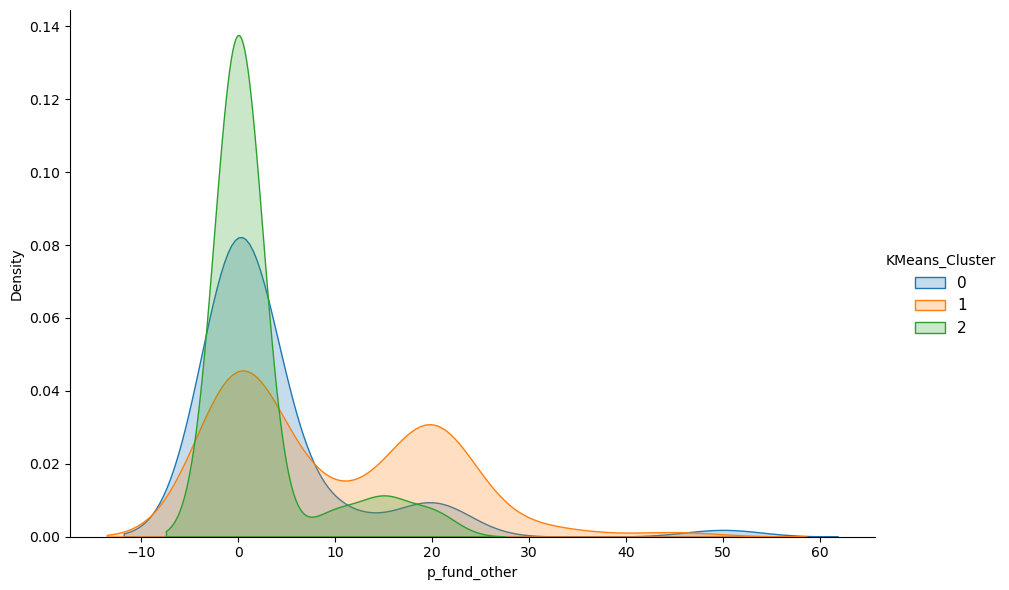

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

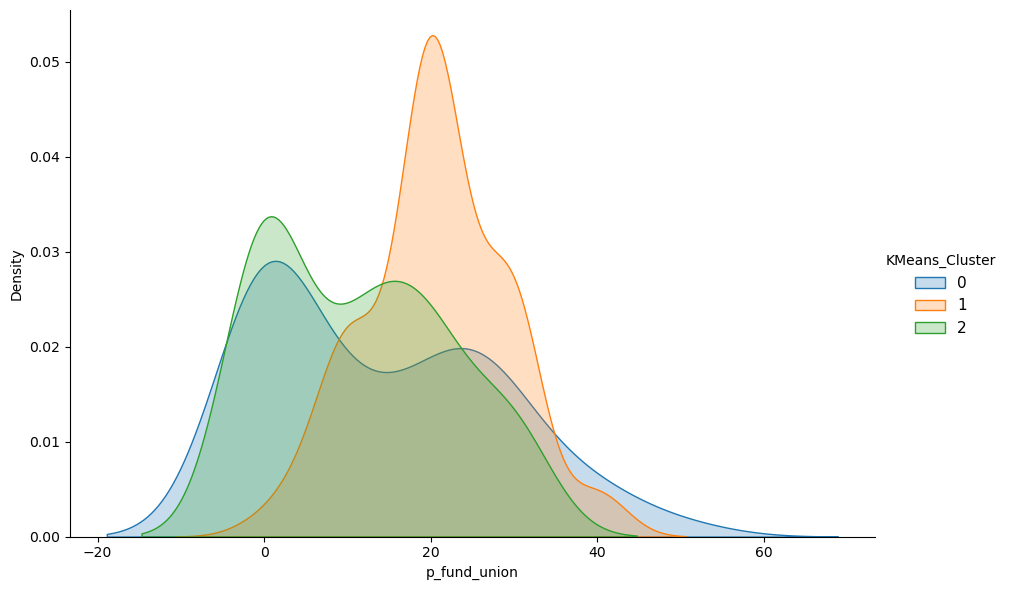

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

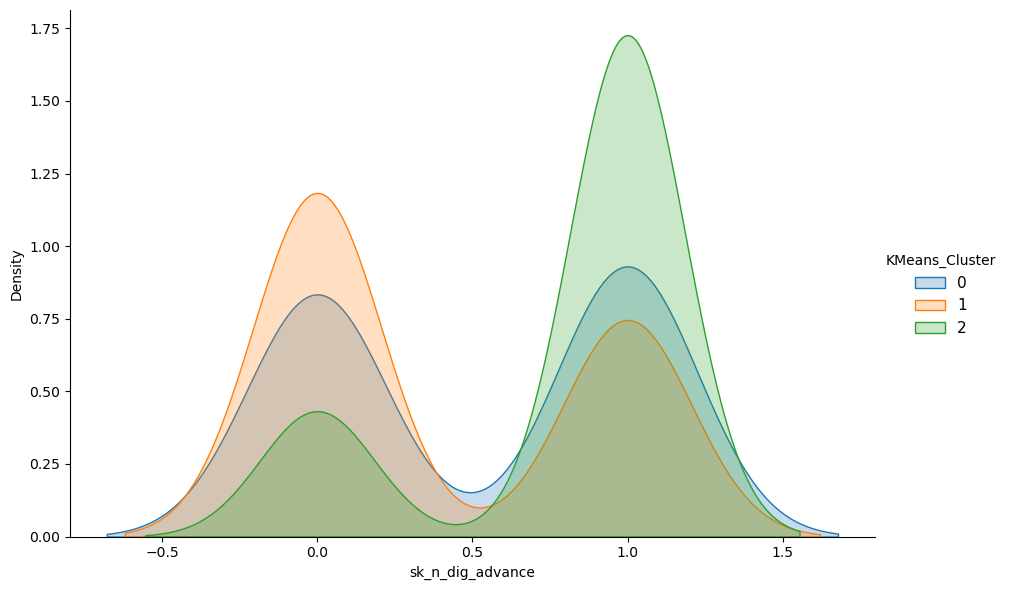

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

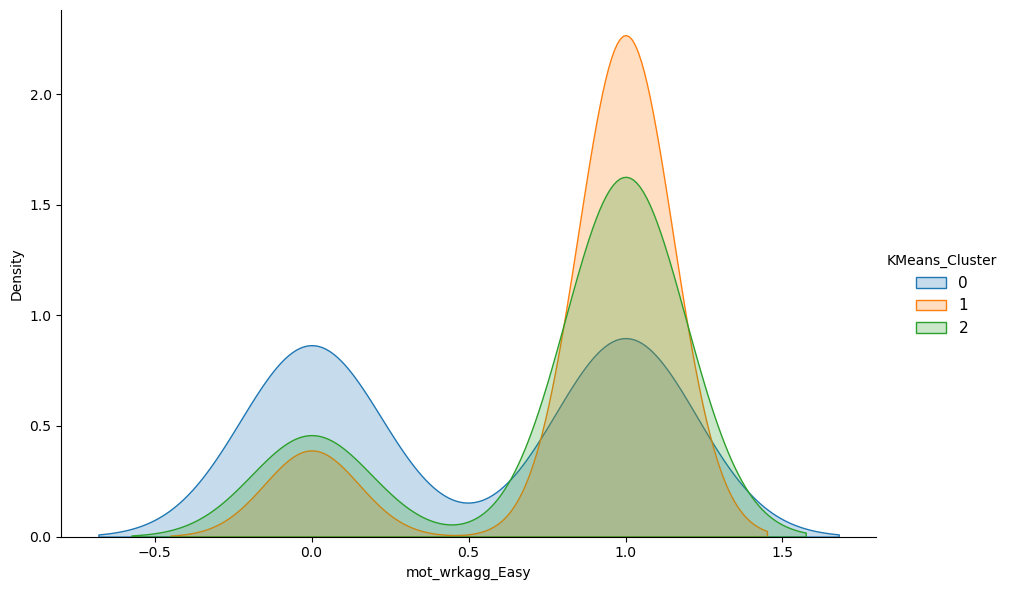

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

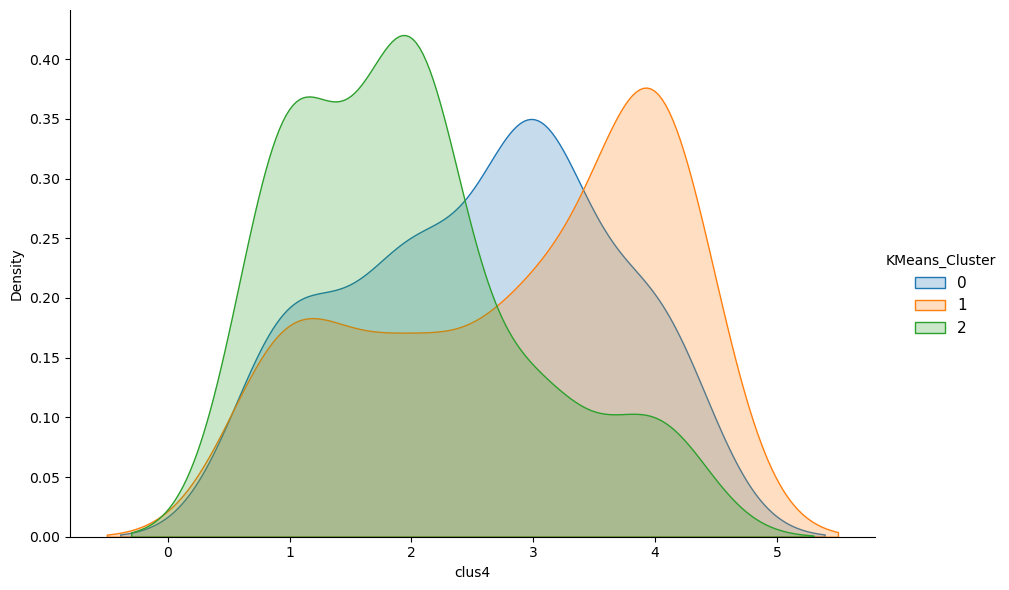

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

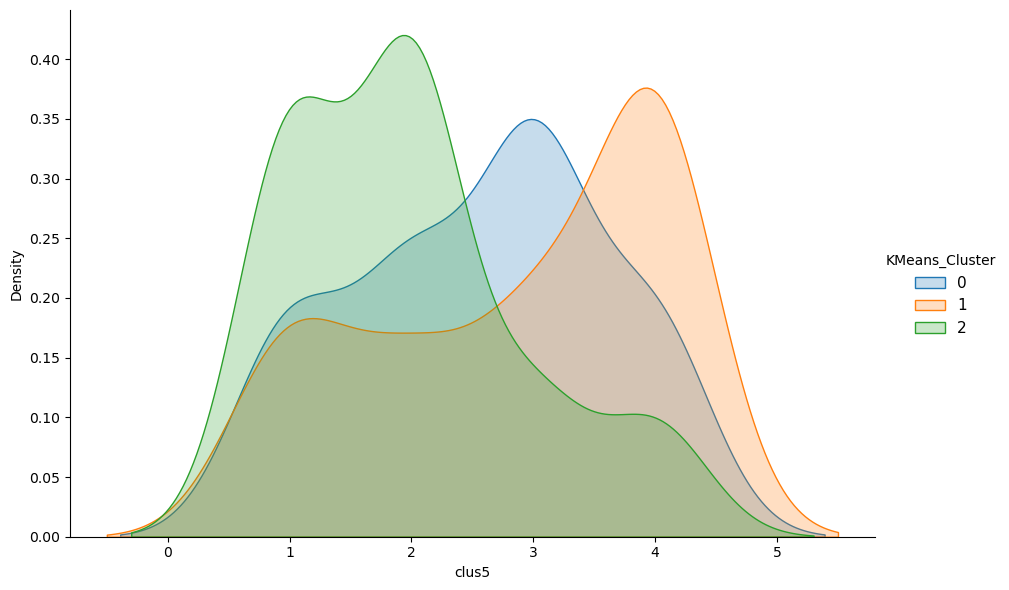

In [11]:
significant_vars = top_vars["Variable"].to_list()
plot_density_for_significant_vars(df, 'KMeans_Cluster', significant_vars)

## Analysis for the 3 clusters without the dummies

In [5]:
df = pd.read_stata("C:/Users/ASUS/Desktop/Harvard/leila_survey/complete_codes/data/V1_qualflags_analysis2_ML.dta")
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Delete NA's
df_numeric = df_numeric.dropna(axis=1, how='all')
df_numeric

def es_dummy(col):
    return col.dropna().isin([0, 1]).all()

# Columns no Dummies
#df_numeric=df_numeric.dropna()

df_sin_dummies = df_numeric.loc[:, ~df_numeric.apply(es_dummy)]

df_sin_year = df_sin_dummies.loc[:, ~df_sin_dummies.columns.str.contains('year', case=False)]



df_sin_year

f_size_n  f_sub_number  f_own  num_checked  p_program_length  \
0          2.0           0.0    2.0          3.0               4.0   
1          2.0           0.0    3.0          4.0               4.0   
2          2.0           0.0    2.0          2.0               2.0   
3          4.0           0.0    3.0          3.0               1.0   
4          4.0           0.0    3.0          2.0               4.0   
...        ...           ...    ...          ...               ...   
1204       2.0           0.0    2.0          3.0               4.0   
1205       6.0           0.0    1.0          3.0               4.0   
1206       4.0           0.0    5.0          1.0               3.0   
1207       5.0           2.0    5.0          2.0               0.0   
1208       3.0           1.0    4.0          2.0               2.0   

      p_fund_gov  p_fund_org  p_fund_wrk  p_fund_union  p_fund_other  ...  \
0            0.0       100.0         0.0           0.0           0.0  ...   
1            0.0       100.0         0.0           0.0           0.0  ...   
2            0.0       100.0         0.0           0.0           0.0  ...   
3            0.0       100.0         0.0           0.0           0.0  ...   
4            0.0         0.0       100.0           0.0           0.0  ...   
...          ...         ...         ...           ...           ...  ...   
1204        30.0        70.0         0.0           0.0           0.0  ...   
1205         0.0       100.0         0.0           0.0           0.0  ...   
1206         0.0       100.0         0.0           0.0           0.0  ...   
1207        20.0        70.0         0.0           0.0          10.0  ...   
1208        34.0        16.0        25.0          15.0          10.0  ...   

      sum_tr_sk  tr_clus4  tr_eligibility  tr_part  tr_part_exp  \
0           9.0       3.0            32.0     20.0         16.0   
1           6.0       3.0            40.0     84.0         59.0   
2           2.0       4.0            19.0     11.0         14.0   
3           3.0       1.0            82.0     68.0        100.0   
4           6.0       1.0            12.0     15.0         14.0   
...         ...       ...             ...      ...          ...   
1204        7.0       3.0            44.0     58.0         55.0   
1205        5.0       1.0            50.0     73.0         81.0   
1206       12.0       2.0            50.0     20.0         50.0   
1207        7.0       3.0            43.0     25.0         37.0   
1208        3.0       4.0            69.0     83.0         74.0   

      p_participated_coarse  sum_sk_match  share_matched  tot_kpi_tracked  \
0                       1.0           0.0            NaN              9.0   
1                       2.0           3.0       0.750000              5.0   
2                       1.0           0.0            NaN              2.0   
3                       3.0           2.0       0.500000              3.0   
4                       3.0           5.0       0.555556              4.0   
...                     ...           ...            ...              ...   
1204                    2.0           0.0            NaN              6.0   
1205                    3.0           2.0       0.285714              5.0   
1206                    2.0           0.0            NaN              4.0   
1207                    2.0           2.0       0.400000              7.0   
1208                    3.0           2.0       0.666667              3.0   

      lev_all  
0         3.0  
1         4.0  
2         2.0  
3         3.0  
4         2.0  
...       ...  
1204      3.0  
1205      3.0  
1206      1.0  
1207      2.0  
1208      2.0  

[1209 rows x 36 columns]

In [42]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#from sklearn_extra.cluster import KMedoids  # For K-Medoids clustering

# Step 1: UMAP for dimensionality reduction
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df_sin_year.dropna())  # UMAP reduces the data to 2D

# Step 2: Apply K-Means clustering to the UMAP-reduced data
n_clusters = 3  # Choose the number of clusters (e.g., 3 clusters)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(embedding)  # Perform clustering on the UMAP output

# Step 3: Apply K-Medoids clustering to the UMAP-reduced data
#kmedoids = KMedoids(n_clusters=n_clusters, random_state=42, metric='euclidean')
#cluster_labels_kmedoids = kmedoids.fit_predict(embedding)  # Perform clustering on the UMAP output

# -------------------------
# Saving clusters to dataset
# -------------------------

# Make sure to drop missing values from the original data to match the reduced embedding data
# This is important because UMAP was fit on the data without missing values.
relevant_program_data_dummies_clusters = df_sin_year.dropna().copy()

# Step 4: Add the cluster labels from both K-Means and K-Medoids to the original DataFrame
relevant_program_data_dummies_clusters['KMeans_Cluster'] = cluster_labels_kmeans
#relevant_program_data_dummies_clusters['KMedoids_Cluster'] = cluster_labels_kmedoids

# Step 5: Save the DataFrame to a new CSV file (or any format you prefer)
#relevant_program_data_dummies_clusters.to_csv('relevant_program_data_dummies_clusters.csv', index=False)

# You can also inspect the first few rows to check the clusters
print(relevant_program_data_dummies_clusters.head())


C:\Users\ASUS\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


   f_size_n  f_sub_number  f_own  num_checked  p_program_length  p_fund_gov  \
1       2.0           0.0    3.0          4.0               4.0         0.0   
3       4.0           0.0    3.0          3.0               1.0         0.0   
4       4.0           0.0    3.0          2.0               4.0         0.0   
7       2.0           0.0    3.0          3.0               4.0         0.0   
8       7.0           0.0    5.0          1.0               3.0         0.0   

   p_fund_org  p_fund_wrk  p_fund_union  p_fund_other  ...  tr_clus4  \
1       100.0         0.0           0.0           0.0  ...       3.0   
3       100.0         0.0           0.0           0.0  ...       1.0   
4         0.0       100.0           0.0           0.0  ...       1.0   
7       100.0         0.0           0.0           0.0  ...       1.0   
8       100.0         0.0           0.0           0.0  ...       1.0   

   tr_eligibility  tr_part  tr_part_exp  p_participated_coarse  sum_sk_match  \
1           

In [44]:
df=relevant_program_data_dummies_clusters

In [46]:
groups = df['KMeans_Cluster'].unique()

# Dictionary to store p-values
p_values = {}

# Perform ANOVA for each variable
for column in df.columns:
    if column != 'KMeans_Cluster':
        # Extract data for each group
        group_data = [df[df['KMeans_Cluster'] == group][column] for group in groups]
        
        # Perform ANOVA
        f_statistic, p_value = f_oneway(*group_data)
        
        # Store p-value
        p_values[column] = p_value

# Convert results to a DataFrame
p_values_df = pd.DataFrame(list(p_values.items()), columns=['Variable', 'p_value'])


alpha = 0.05

significant_vars = p_values_df[p_values_df['p_value'] < alpha]

top_vars = significant_vars.sort_values('p_value').head(20)

print(significant_vars)

                 Variable        p_value
0                f_size_n   4.364481e-04
1            f_sub_number   4.484197e-03
4        p_program_length   4.224890e-04
5              p_fund_gov   2.080573e-96
6              p_fund_org  1.185893e-305
7              p_fund_wrk   2.599070e-79
8            p_fund_union  1.745916e-114
9            p_fund_other   4.106139e-40
10          p_eligibility   1.707385e-39
11                 p_part   1.594839e-90
12             p_part_exp   1.536075e-67
13       p_effect_reverse   6.578688e-04
15            b_sk_n_soft   5.786249e-03
17         b_sk_n_digital   1.362656e-02
18      b_sk_n_functional   3.695130e-02
19            sk_selected   7.152269e-03
20        sha_b_sk_n_soft   1.009934e-02
24                  clus4   6.048743e-03
25                  clus5   6.048744e-03
28         tr_eligibility   1.707385e-39
29                tr_part   1.594839e-90
30            tr_part_exp   1.536075e-67
31  p_participated_coarse   1.659162e-14
33          shar

C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [48]:
def plot_density_for_significant_vars(df, group_col, significant_vars, alpha=0.05):

    # Check if the group column exists in the DataFrame
    if group_col not in df.columns:
        raise ValueError(f"Group column '{group_col}' not found in DataFrame.")
    
    # Check if significant_vars is empty
    if not significant_vars:
        raise ValueError("No significant variables provided.")
    
    # Create a density plot for each significant variable
    for var in significant_vars:
        if var not in df.columns:
            print(f"Variable '{var}' not found in DataFrame.")
            continue
        
        plt.figure(figsize=(8, 6))
        g = sns.FacetGrid(df, hue=group_col, height=6, aspect=1.5)
        g.map(sns.kdeplot, var, fill=True, palette="Set2", common_norm=False)
        g.set_titles(f'Density Plot for {var}')
        g.set_axis_labels(var, 'Density')
        g.add_legend(title=group_col, title_fontsize='13', fontsize='11')
        
        plt.show()


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

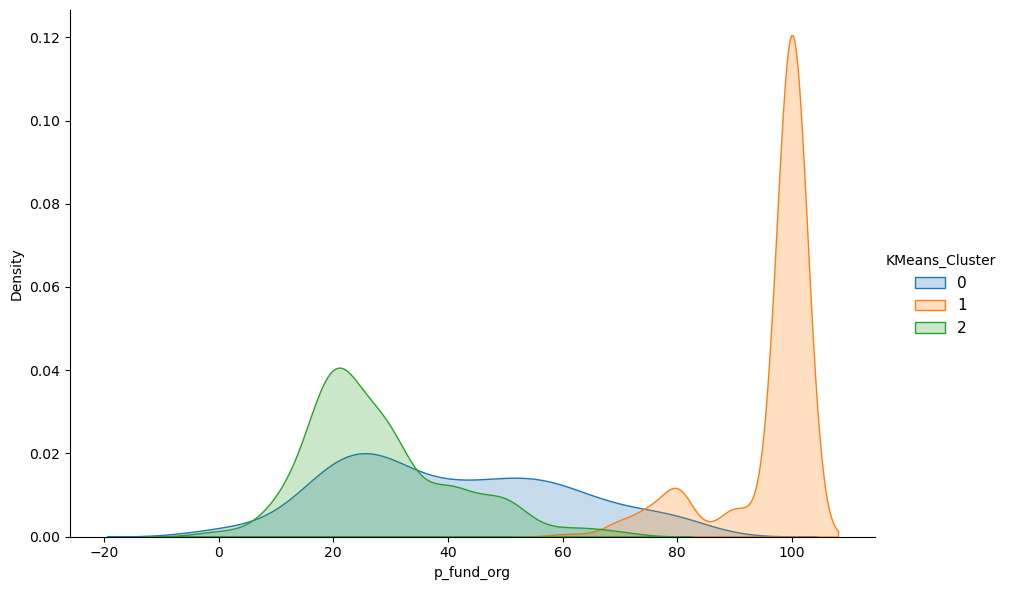

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

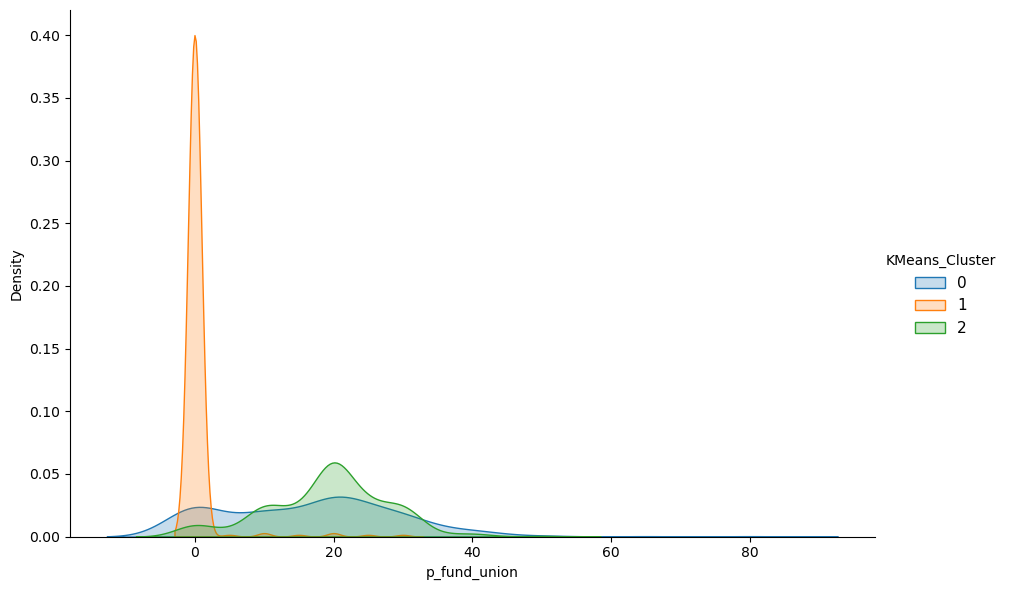

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

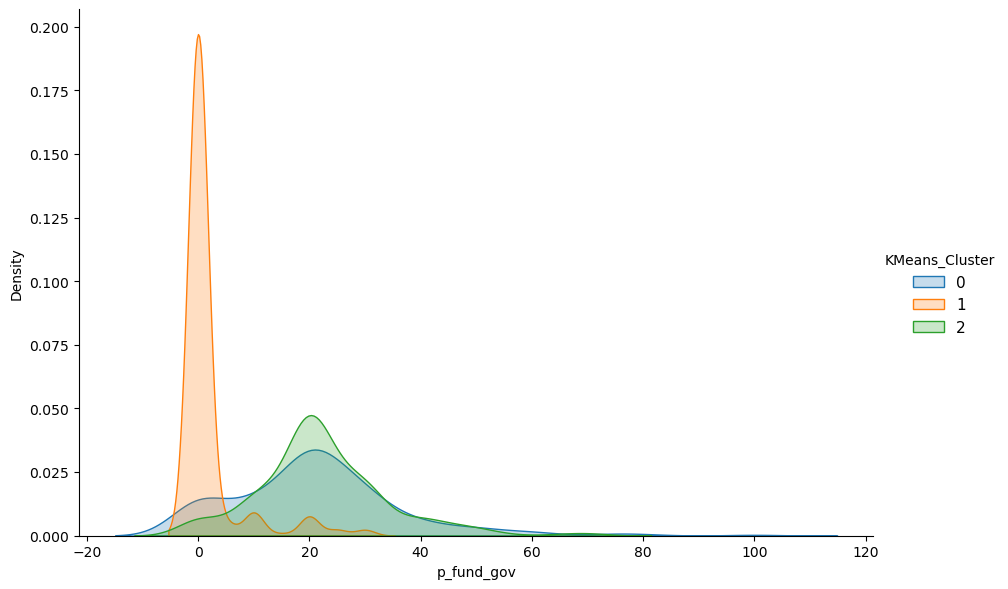

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

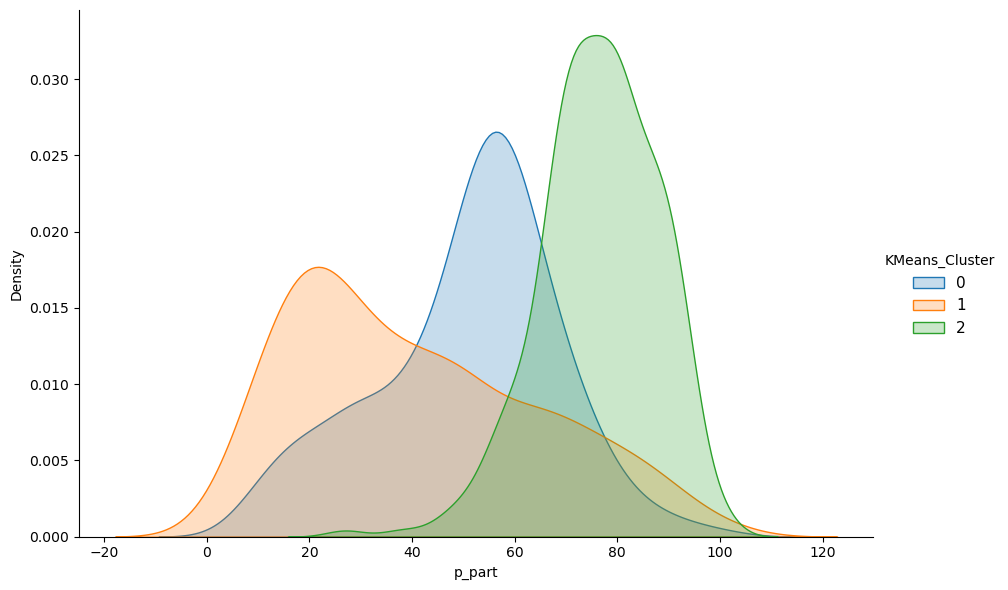

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

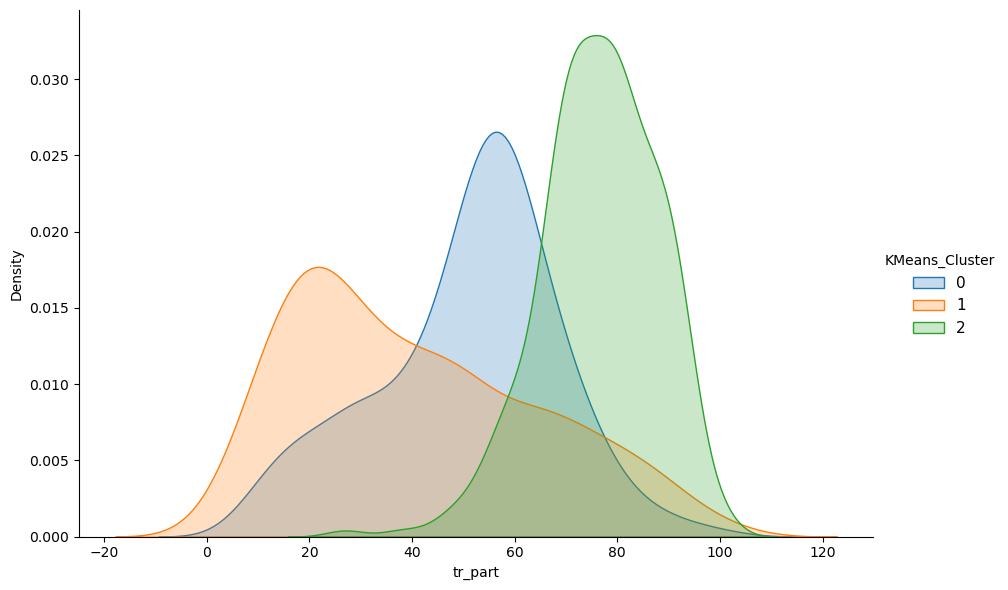

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

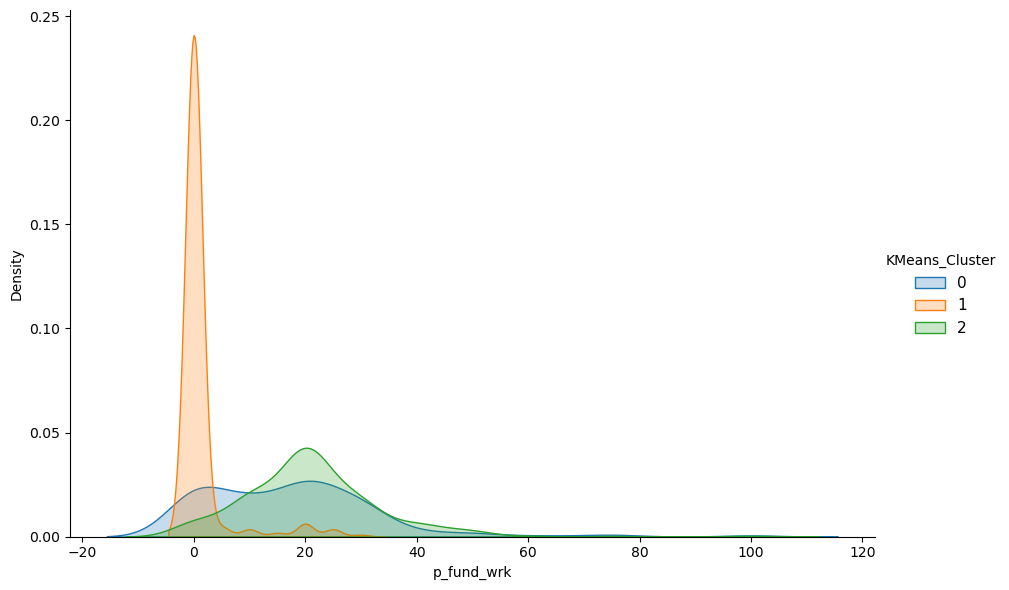

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

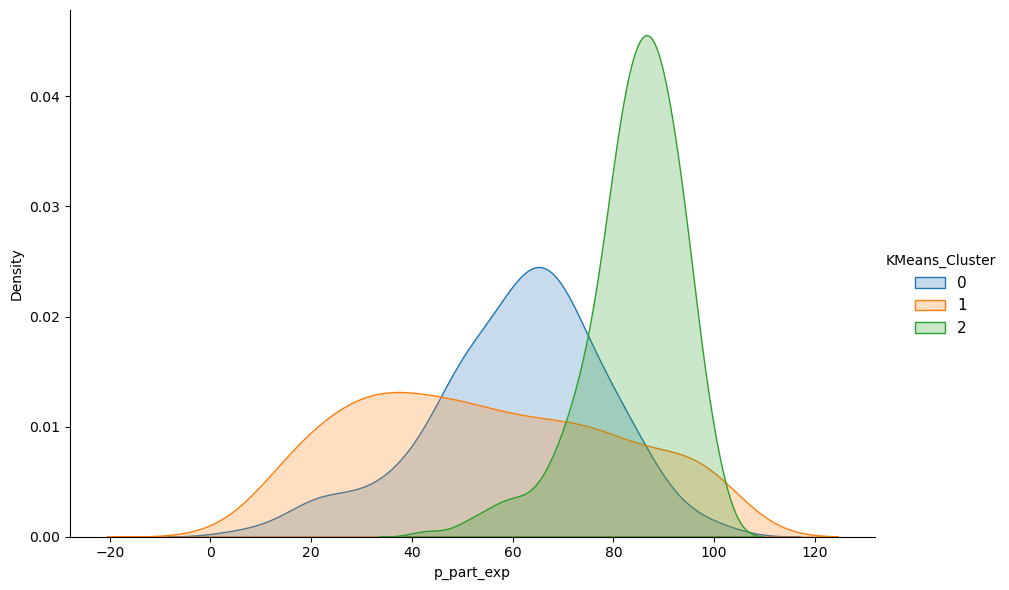

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

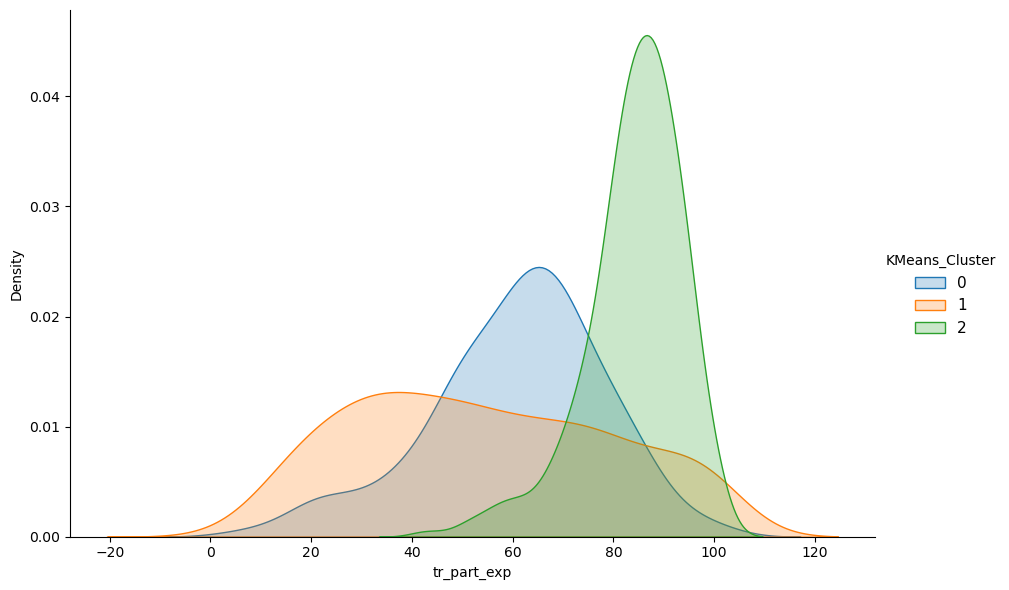

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

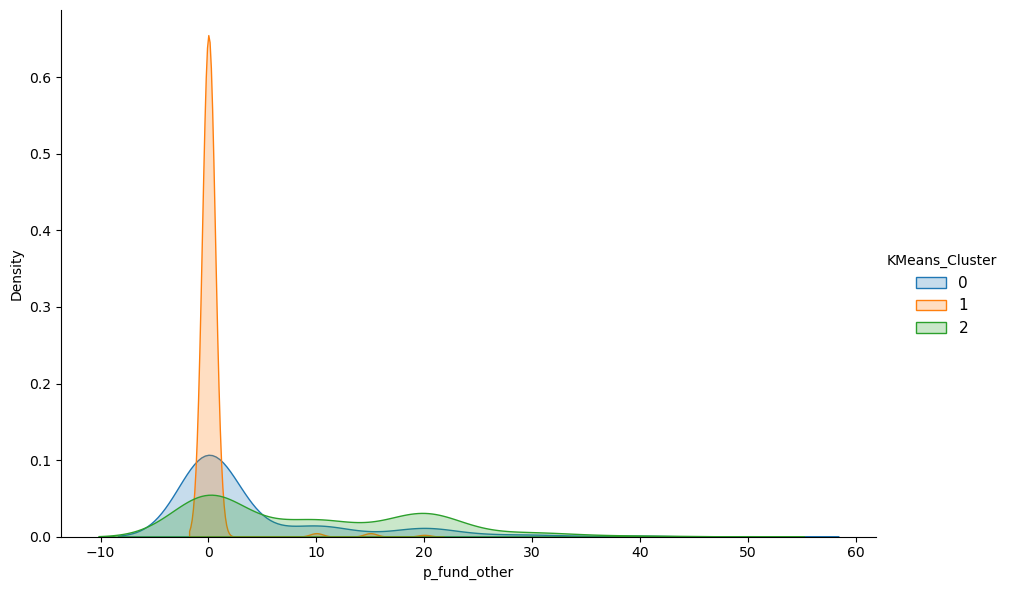

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

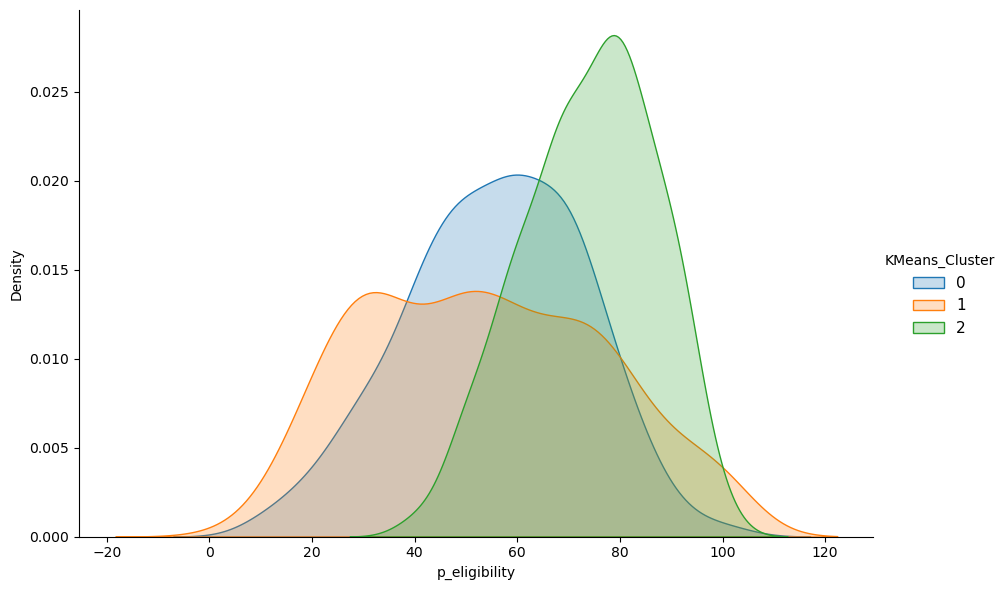

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

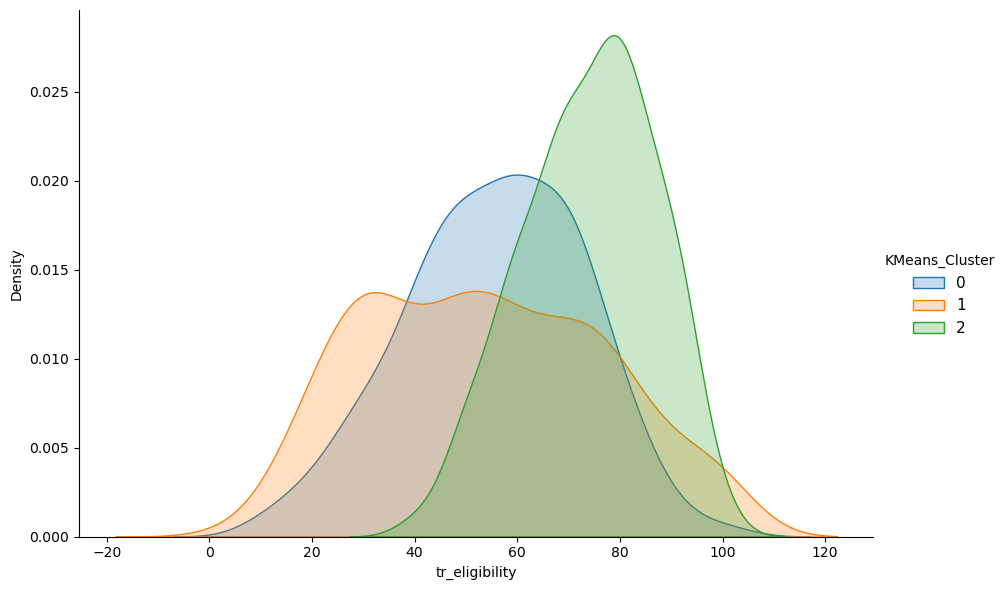

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

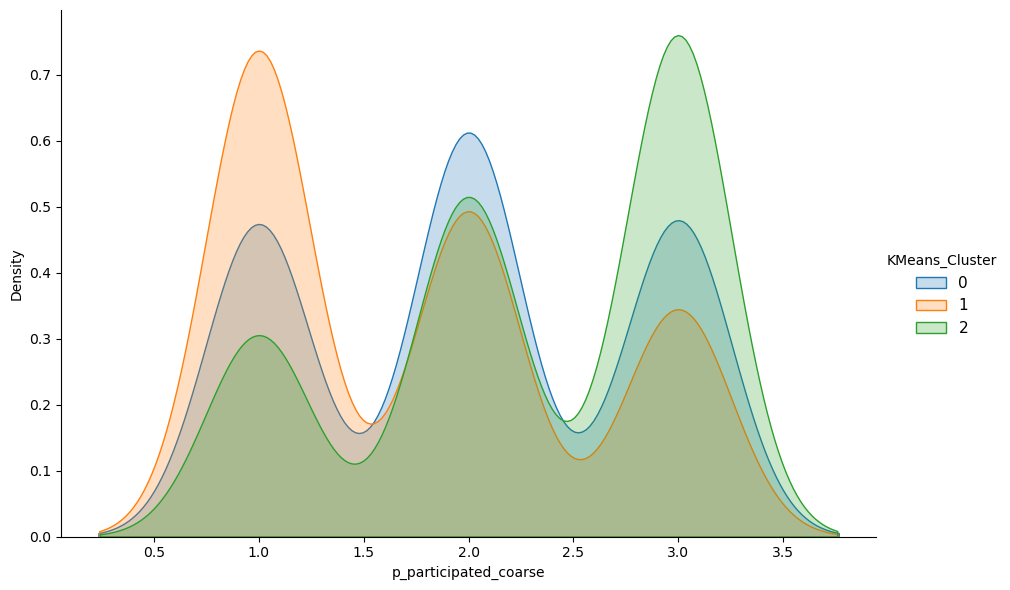

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

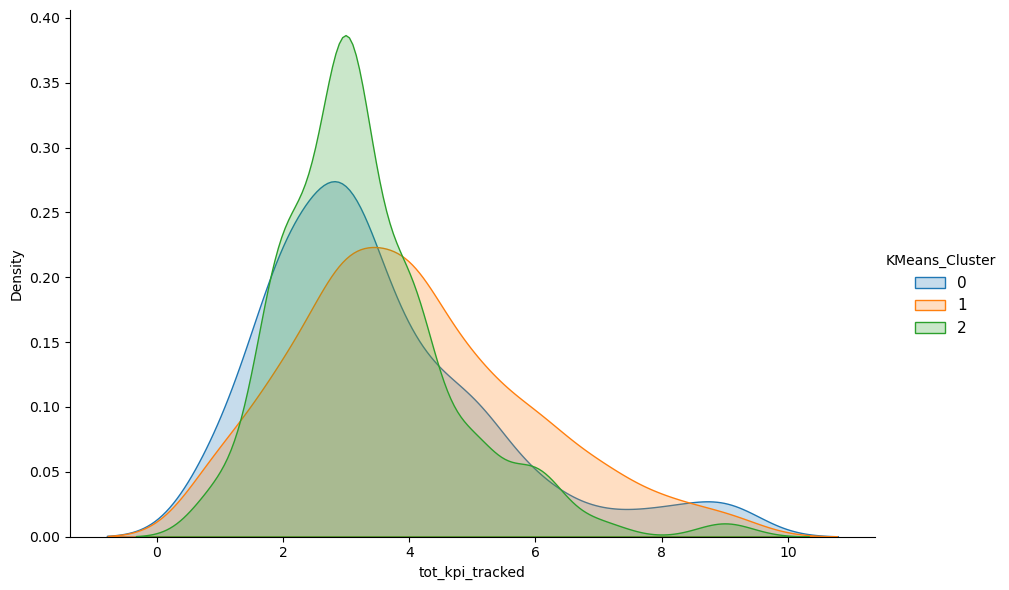

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

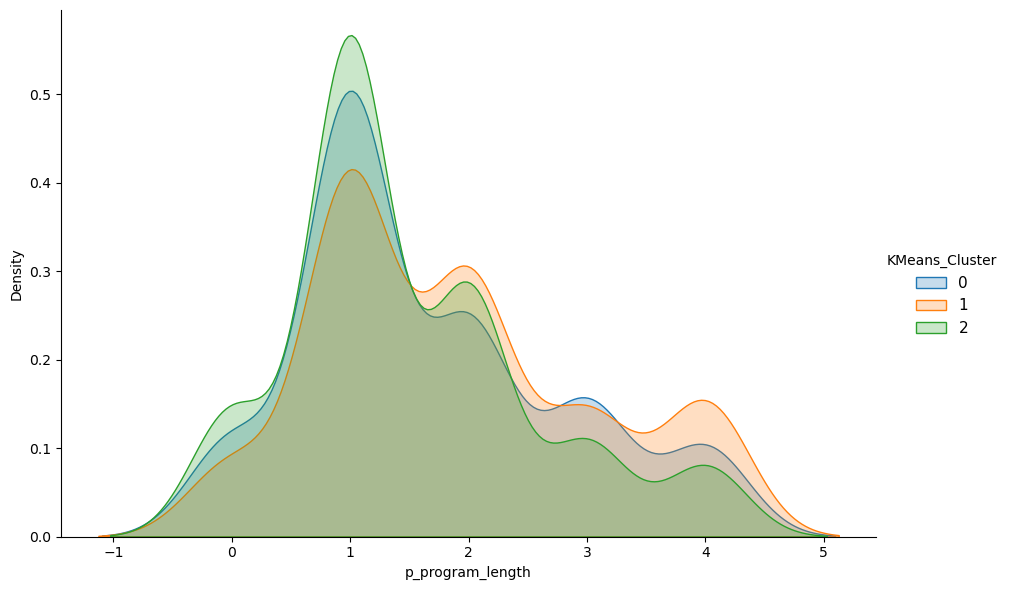

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

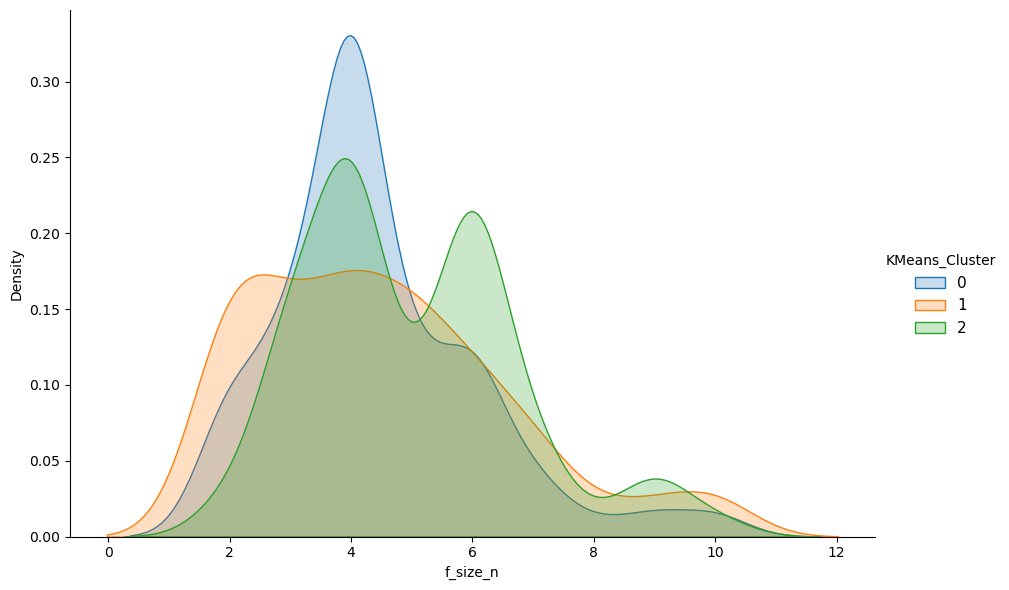

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

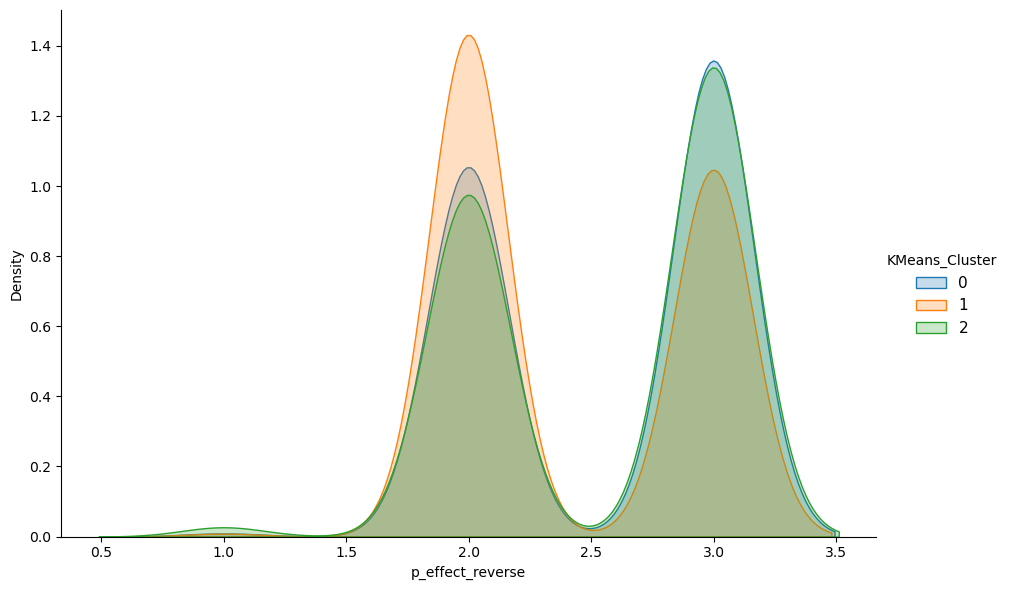

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

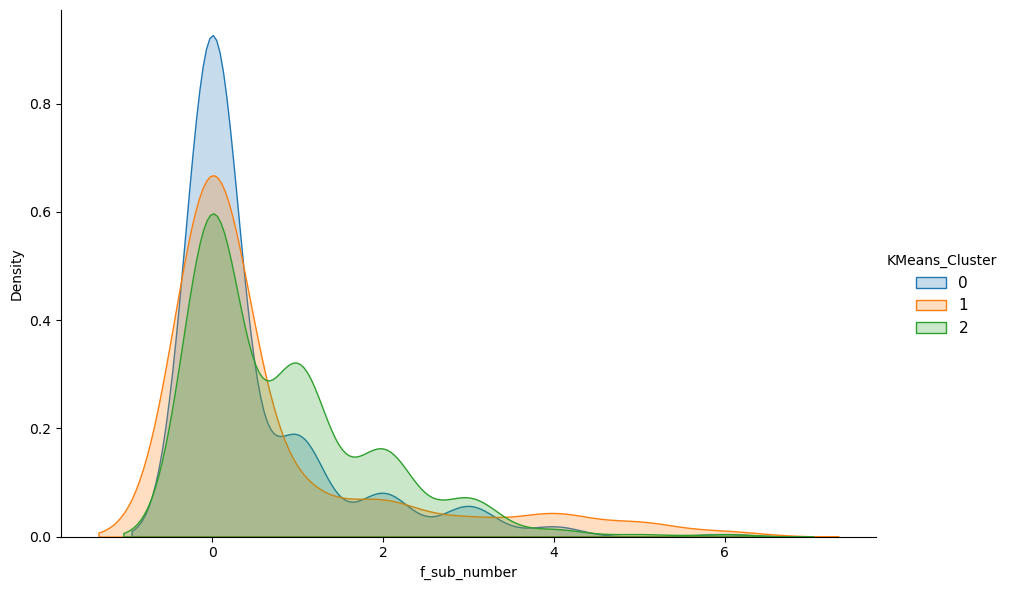

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

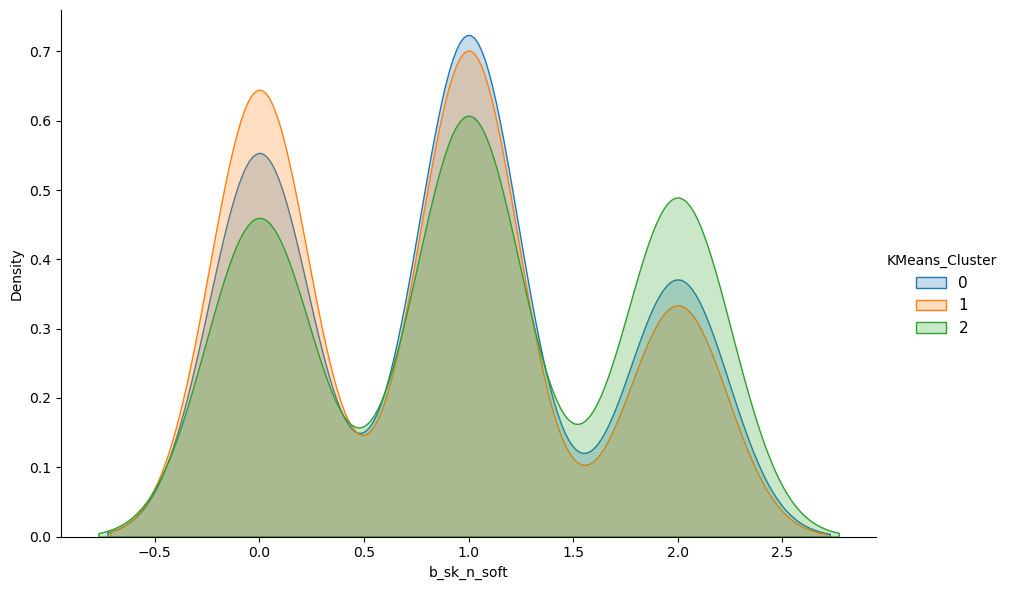

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

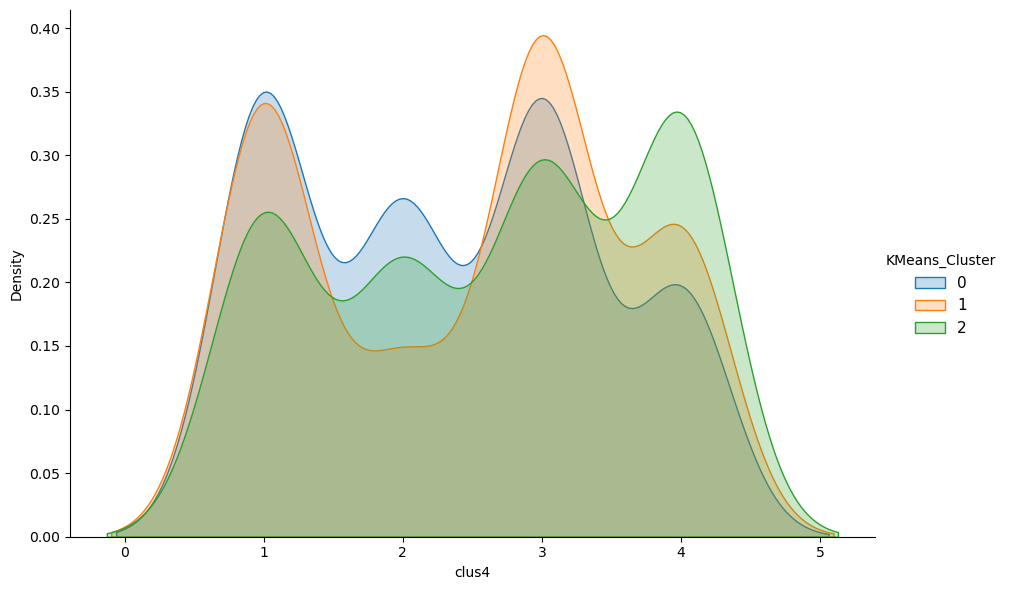

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


<Figure size 800x600 with 0 Axes>

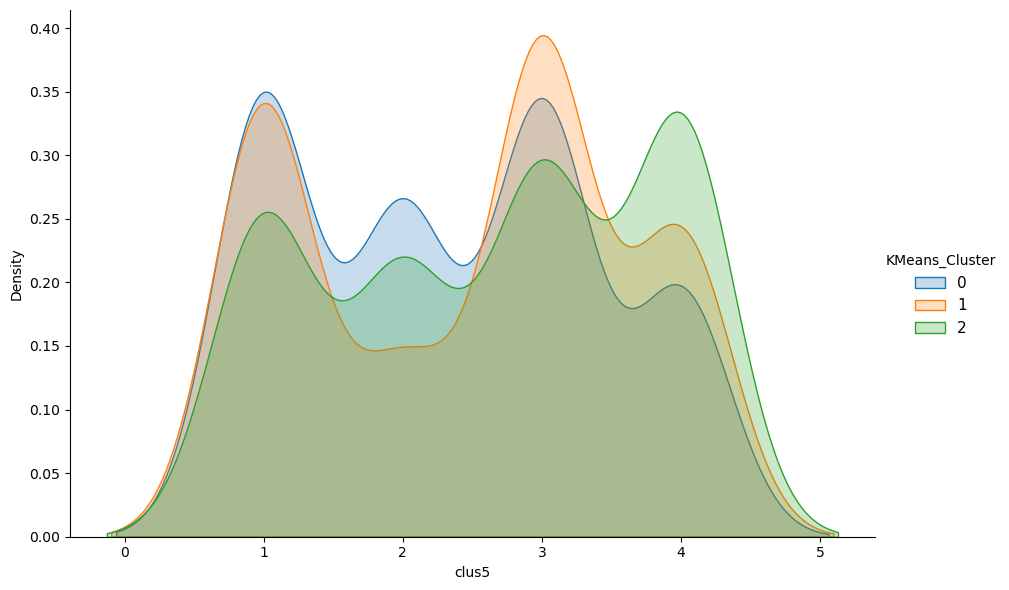

In [50]:
significant_vars = top_vars["Variable"].to_list()
plot_density_for_significant_vars(df, 'KMeans_Cluster', significant_vars)

# Analysis using 2 clusters

In [13]:
from scipy import stats

In [19]:
df=pd.read_csv("C:/Users/ASUS/Desktop/Harvard/leila_survey/complete_codes/data/clusters_2_construction.csv")
# delete some specific repeated columns
#df.drop(["tr_part","tr_eligibility","tr_part_exp"], axis=1, inplace=True)
df.head()

f_size_n  f_hq_na  f_mne  f_mne_us  f_mne_nonus  f_sub_asia  f_sub_africa  \
0       2.0      1.0    0.0       0.0          0.0         0.0           0.0   
1       5.0      1.0    1.0       1.0          0.0         0.0           0.0   
2       4.0      1.0    0.0       0.0          0.0         0.0           0.0   
3       2.0      1.0    0.0       0.0          0.0         0.0           0.0   
4       2.0      1.0    1.0       1.0          0.0         0.0           0.0   

   f_sub_northamerica  f_sub_southamerica  f_sub_europe  ...  \
0                 0.0                 0.0           0.0  ...   
1                 1.0                 0.0           0.0  ...   
2                 0.0                 0.0           0.0  ...   
3                 0.0                 0.0           0.0  ...   
4                 1.0                 0.0           0.0  ...   

   sk_gapcertainty_Not confident at all  sk_gapcertainty_Not very confident  \
0                                 False                               False   
1                                 False                               False   
2                                 False                               False   
3                                 False                               False   
4                                 False                               False   

   sk_gapcertainty_Somewhat confident  sk_gapcertainty_Very confident  \
0                                True                           False   
1                               False                            True   
2                                True                           False   
3                               False                           False   
4                               False                            True   

   sk_gapcertainty_Completely certain  tr_clusplot2_Digital+Cognitive  \
0                               False                           False   
1                               False                            True   
2                               False                           False   
3                                True                           False   
4                               False                           False   

   tr_clusplot2_Everything  tr_clusplot2_Soft  tr_clusplot2_Digital+Soft  \
0                    False               True                      False   
1                    False              False                      False   
2                    False               True                      False   
3                     True              False                      False   
4                    False               True                      False   

   KMeans_Cluster  
0               0  
1               1  
2               0  
3               0  
4               0  

[5 rows x 761 columns]

### T-Test

C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14840\2709848824.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_X[col], label='Cluster 0', shade=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14840\2709848824.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_Y[col], label='Cluster 1', shade=True)


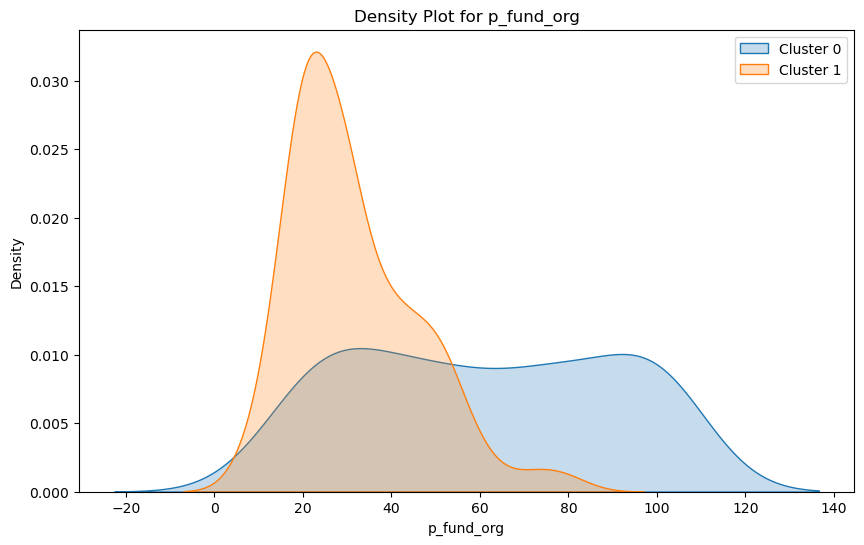

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14840\2709848824.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_X[col], label='Cluster 0', shade=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14840\2709848824.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_Y[col], label='Cluster 1', shade=True)


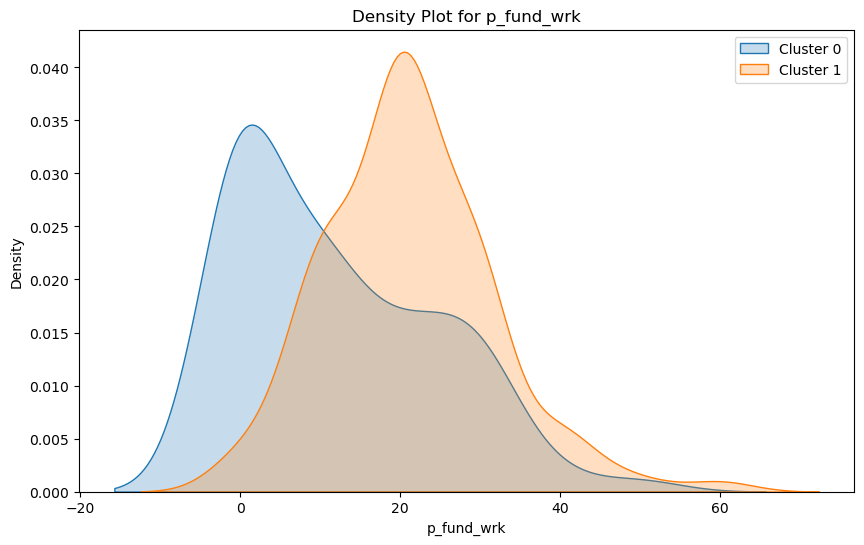

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14840\2709848824.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_X[col], label='Cluster 0', shade=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14840\2709848824.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_Y[col], label='Cluster 1', shade=True)


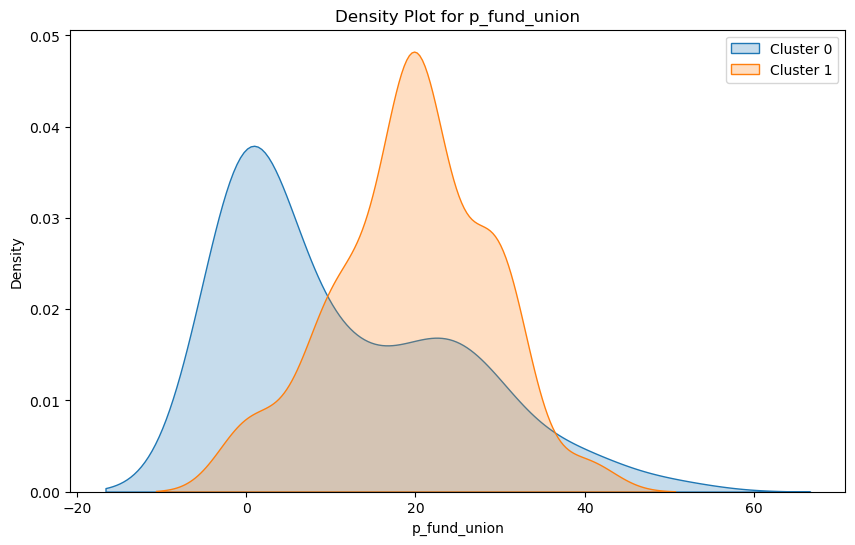

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14840\2709848824.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_X[col], label='Cluster 0', shade=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14840\2709848824.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_Y[col], label='Cluster 1', shade=True)


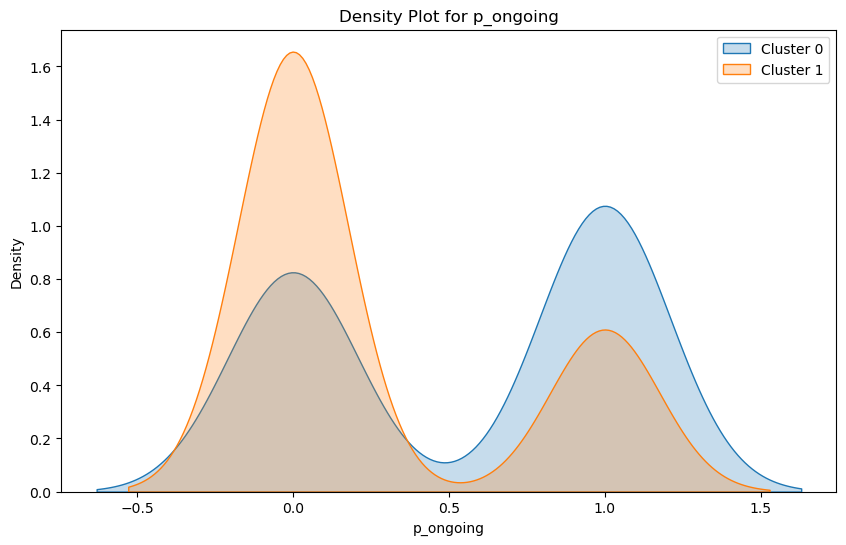

In [21]:
group_X = df[df['KMeans_Cluster'] == 0]
group_Y = df[df['KMeans_Cluster'] == 1]

# Perform t-tests on each column except 'cluster' and sort by p-value
results = []
for col in df.columns:
    if col != 'cluster':
        t_stat, p_value = stats.ttest_ind(group_X[col], group_Y[col], equal_var=False)
        results.append((col, t_stat, p_value))

# Sort by p-value in ascending order and select the top 20
results_sorted = sorted(results, key=lambda x: x[2])[:4]

# Extract the column names of the top 20 significant variables
top_20_significant_cols = [col for col, t_stat, p_value in results_sorted]

# Plot density for top 20 significantly different columns
for col in top_20_significant_cols:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(group_X[col], label='Cluster 0', shade=True)
    sns.kdeplot(group_Y[col], label='Cluster 1', shade=True)
    plt.title(f'Density Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.savefig("C:/Users/ASUS/Desktop/Harvard/leila_survey/"+col+".png")
    plt.show()

In [23]:
results_sorted

[('p_fund_org', -18.165490159212077, 3.0013003768692695e-41),
 ('p_part', 13.735770322360601, 8.201104139362478e-30),
 ('p_fund_union', 12.9828433020145, 6.721202926613889e-29),
 ('p_fund_wrk', 11.626408121832755, 1.7726166620351653e-25),
 ('p_part_exp', 10.884470518028198, 2.248625915880372e-21),
 ('p_fund_gov', 9.662040965676601, 8.609601427205134e-19),
 ('p_eligibility', 9.140315186896, 6.779141360093786e-17),
 ('p_ongoing', -7.981707459308253, 5.3600898467035894e-14),
 ('p_criteria_managerrec', -6.27544562291799, 2.5173859094087407e-09),
 ('p_fund_other', 5.337685251027889, 1.792003841238454e-07),
 ('inc_mgr_rec', 4.795039960709617, 2.80074362864017e-06),
 ('dd_extdesign_gov', 4.42617683652011, 1.312813308856065e-05),
 ('dd_extdesign_ta', 4.37257226236775, 1.7133200297789703e-05),
 ('dd_design_bul', 2.8849293251300376, 0.004234758743800236),
 ('p_program_length', -2.878078704389996, 0.004376948947219387),
 ('inc_mgr_nofin', 2.5701266412089248, 0.01072595666341623),
 ('dd_design_emp

## Analysis for the 2 clusters without dummies

In [7]:
df = pd.read_stata("C:/Users/ASUS/Desktop/Harvard/leila_survey/complete_codes/data/V1_qualflags_analysis2_ML.dta")
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Delete NA's
df_numeric = df_numeric.dropna(axis=1, how='all')
df_numeric

def es_dummy(col):
    return col.dropna().isin([0, 1]).all()

# Columns no Dummies
#df_numeric=df_numeric.dropna()

df_sin_dummies = df_numeric.loc[:, ~df_numeric.apply(es_dummy)]

df_sin_year = df_sin_dummies.loc[:, ~df_sin_dummies.columns.str.contains('year', case=False)]



df_sin_year

f_size_n  f_sub_number  f_own  num_checked  p_program_length  \
0          2.0           0.0    2.0          3.0               4.0   
1          2.0           0.0    3.0          4.0               4.0   
2          2.0           0.0    2.0          2.0               2.0   
3          4.0           0.0    3.0          3.0               1.0   
4          4.0           0.0    3.0          2.0               4.0   
...        ...           ...    ...          ...               ...   
1204       2.0           0.0    2.0          3.0               4.0   
1205       6.0           0.0    1.0          3.0               4.0   
1206       4.0           0.0    5.0          1.0               3.0   
1207       5.0           2.0    5.0          2.0               0.0   
1208       3.0           1.0    4.0          2.0               2.0   

      p_fund_gov  p_fund_org  p_fund_wrk  p_fund_union  p_fund_other  ...  \
0            0.0       100.0         0.0           0.0           0.0  ...   
1            0.0       100.0         0.0           0.0           0.0  ...   
2            0.0       100.0         0.0           0.0           0.0  ...   
3            0.0       100.0         0.0           0.0           0.0  ...   
4            0.0         0.0       100.0           0.0           0.0  ...   
...          ...         ...         ...           ...           ...  ...   
1204        30.0        70.0         0.0           0.0           0.0  ...   
1205         0.0       100.0         0.0           0.0           0.0  ...   
1206         0.0       100.0         0.0           0.0           0.0  ...   
1207        20.0        70.0         0.0           0.0          10.0  ...   
1208        34.0        16.0        25.0          15.0          10.0  ...   

      sum_tr_sk  tr_clus4  tr_eligibility  tr_part  tr_part_exp  \
0           9.0       3.0            32.0     20.0         16.0   
1           6.0       3.0            40.0     84.0         59.0   
2           2.0       4.0            19.0     11.0         14.0   
3           3.0       1.0            82.0     68.0        100.0   
4           6.0       1.0            12.0     15.0         14.0   
...         ...       ...             ...      ...          ...   
1204        7.0       3.0            44.0     58.0         55.0   
1205        5.0       1.0            50.0     73.0         81.0   
1206       12.0       2.0            50.0     20.0         50.0   
1207        7.0       3.0            43.0     25.0         37.0   
1208        3.0       4.0            69.0     83.0         74.0   

      p_participated_coarse  sum_sk_match  share_matched  tot_kpi_tracked  \
0                       1.0           0.0            NaN              9.0   
1                       2.0           3.0       0.750000              5.0   
2                       1.0           0.0            NaN              2.0   
3                       3.0           2.0       0.500000              3.0   
4                       3.0           5.0       0.555556              4.0   
...                     ...           ...            ...              ...   
1204                    2.0           0.0            NaN              6.0   
1205                    3.0           2.0       0.285714              5.0   
1206                    2.0           0.0            NaN              4.0   
1207                    2.0           2.0       0.400000              7.0   
1208                    3.0           2.0       0.666667              3.0   

      lev_all  
0         3.0  
1         4.0  
2         2.0  
3         3.0  
4         2.0  
...       ...  
1204      3.0  
1205      3.0  
1206      1.0  
1207      2.0  
1208      2.0  

[1209 rows x 36 columns]

In [9]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#from sklearn_extra.cluster import KMedoids  # For K-Medoids clustering

# Step 1: UMAP for dimensionality reduction
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df_sin_year.dropna())  # UMAP reduces the data to 2D

# Step 2: Apply K-Means clustering to the UMAP-reduced data
n_clusters = 2  # Choose the number of clusters (e.g., 3 clusters)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(embedding)  # Perform clustering on the UMAP output

# Step 3: Apply K-Medoids clustering to the UMAP-reduced data
#kmedoids = KMedoids(n_clusters=n_clusters, random_state=42, metric='euclidean')
#cluster_labels_kmedoids = kmedoids.fit_predict(embedding)  # Perform clustering on the UMAP output

# -------------------------
# Saving clusters to dataset
# -------------------------

# Make sure to drop missing values from the original data to match the reduced embedding data
# This is important because UMAP was fit on the data without missing values.
relevant_program_data_dummies_clusters = df_sin_year.dropna().copy()

# Step 4: Add the cluster labels from both K-Means and K-Medoids to the original DataFrame
relevant_program_data_dummies_clusters['KMeans_Cluster'] = cluster_labels_kmeans
#relevant_program_data_dummies_clusters['KMedoids_Cluster'] = cluster_labels_kmedoids

# Step 5: Save the DataFrame to a new CSV file (or any format you prefer)
#relevant_program_data_dummies_clusters.to_csv('relevant_program_data_dummies_clusters.csv', index=False)

# You can also inspect the first few rows to check the clusters
print(relevant_program_data_dummies_clusters.head())


C:\Users\ASUS\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


   f_size_n  f_sub_number  f_own  num_checked  p_program_length  p_fund_gov  \
1       2.0           0.0    3.0          4.0               4.0         0.0   
3       4.0           0.0    3.0          3.0               1.0         0.0   
4       4.0           0.0    3.0          2.0               4.0         0.0   
7       2.0           0.0    3.0          3.0               4.0         0.0   
8       7.0           0.0    5.0          1.0               3.0         0.0   

   p_fund_org  p_fund_wrk  p_fund_union  p_fund_other  ...  tr_clus4  \
1       100.0         0.0           0.0           0.0  ...       3.0   
3       100.0         0.0           0.0           0.0  ...       1.0   
4         0.0       100.0           0.0           0.0  ...       1.0   
7       100.0         0.0           0.0           0.0  ...       1.0   
8       100.0         0.0           0.0           0.0  ...       1.0   

   tr_eligibility  tr_part  tr_part_exp  p_participated_coarse  sum_sk_match  \
1           

C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_X[col], label='Cluster 0', shade=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(group_X[col], label='Cluster 0', shade=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v

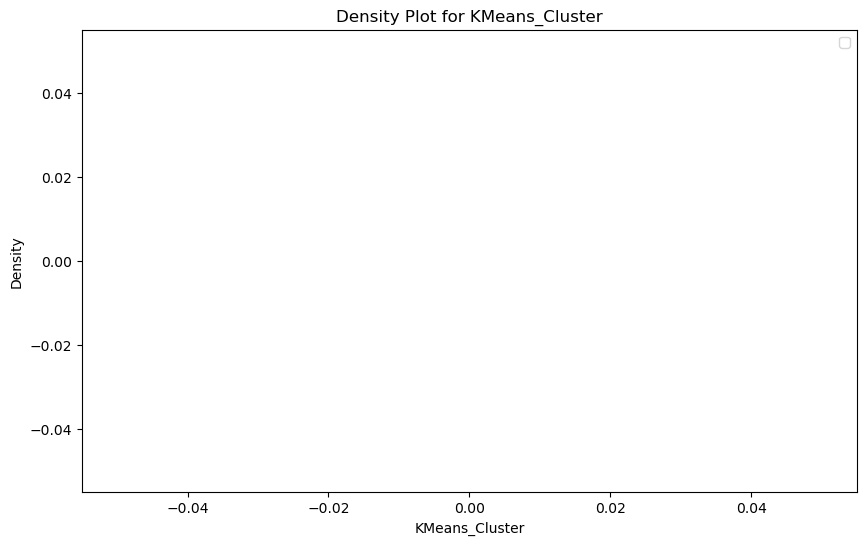

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_X[col], label='Cluster 0', shade=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_Y[col], label='Cluster 1', shade=True)


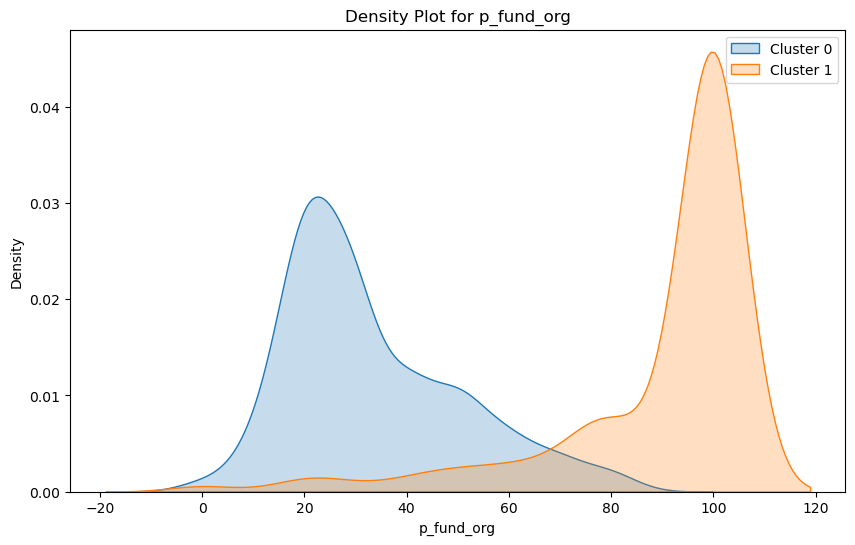

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_X[col], label='Cluster 0', shade=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_Y[col], label='Cluster 1', shade=True)


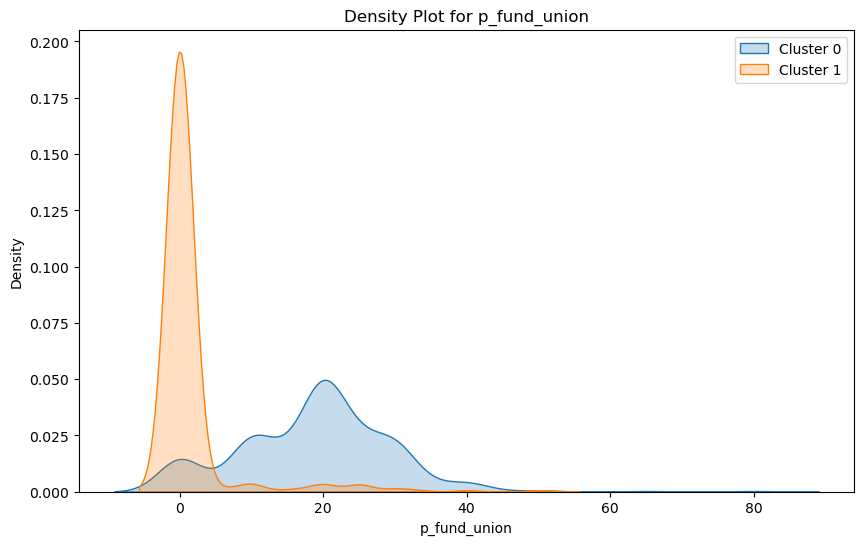

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_X[col], label='Cluster 0', shade=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_Y[col], label='Cluster 1', shade=True)


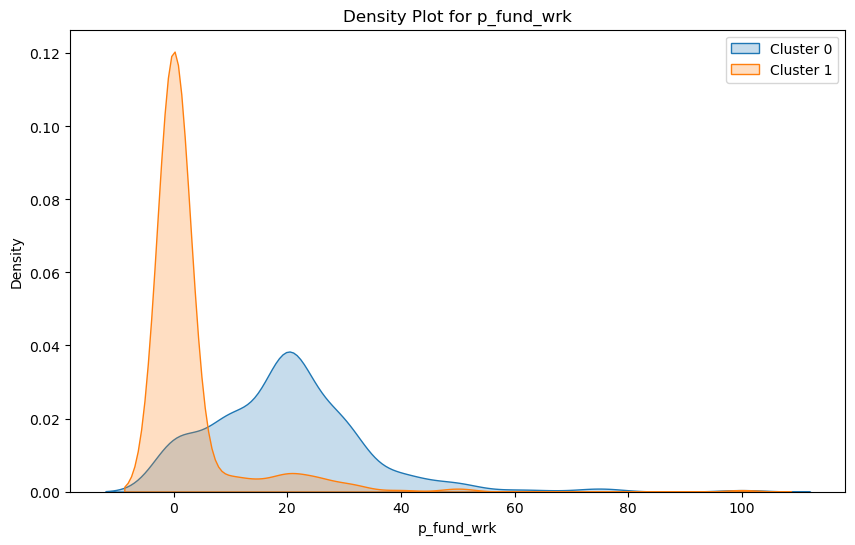

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_X[col], label='Cluster 0', shade=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_Y[col], label='Cluster 1', shade=True)


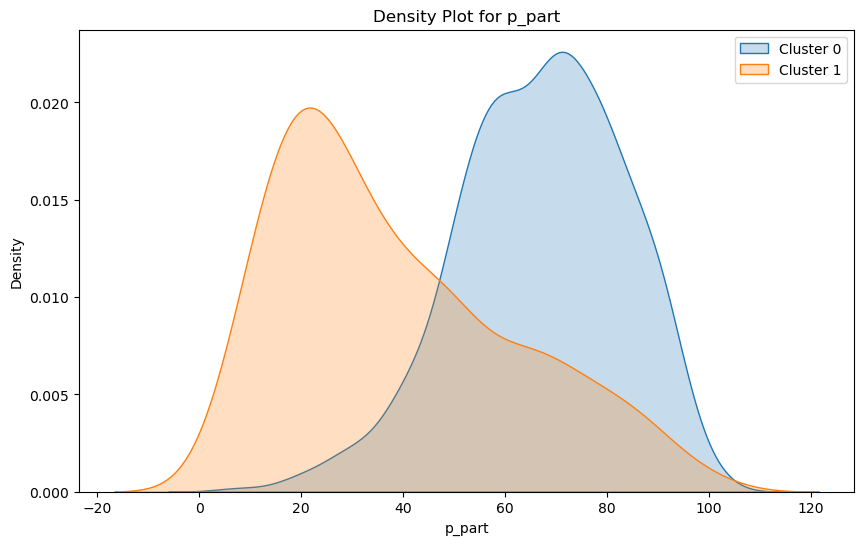

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_X[col], label='Cluster 0', shade=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_Y[col], label='Cluster 1', shade=True)


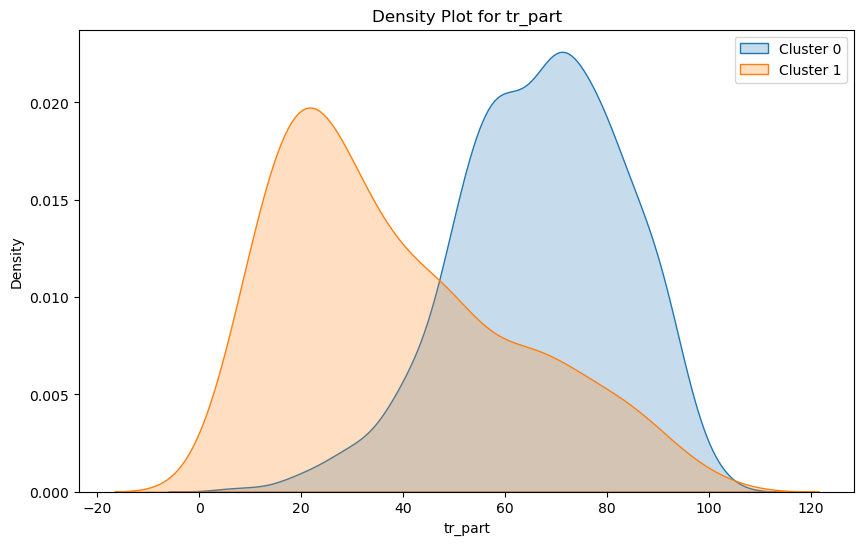

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_X[col], label='Cluster 0', shade=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_Y[col], label='Cluster 1', shade=True)


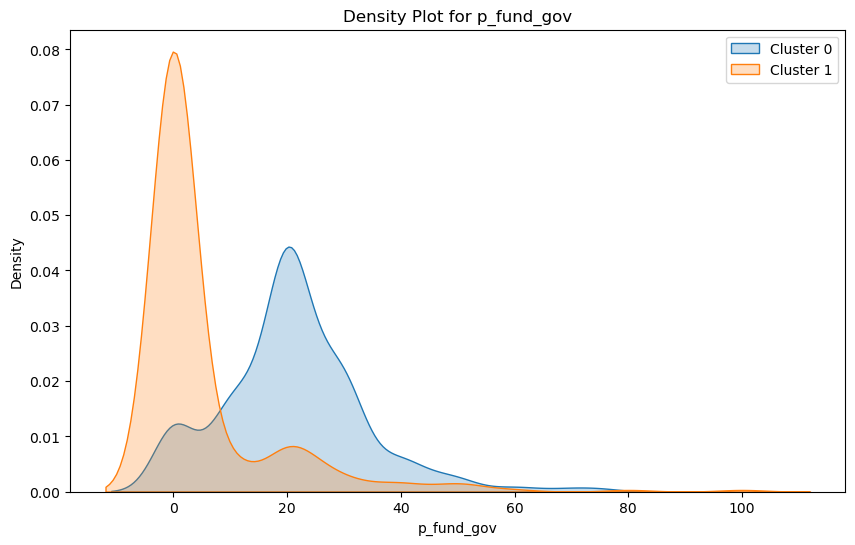

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_X[col], label='Cluster 0', shade=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_Y[col], label='Cluster 1', shade=True)


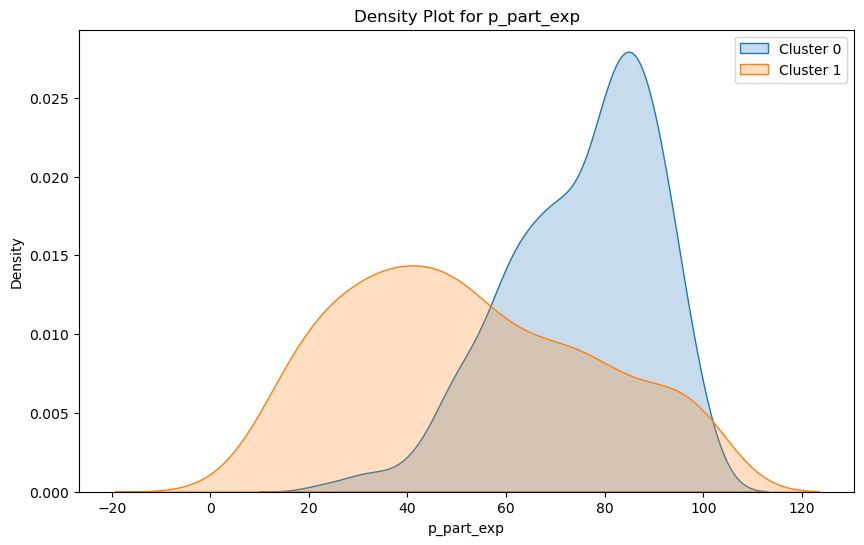

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_X[col], label='Cluster 0', shade=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_Y[col], label='Cluster 1', shade=True)


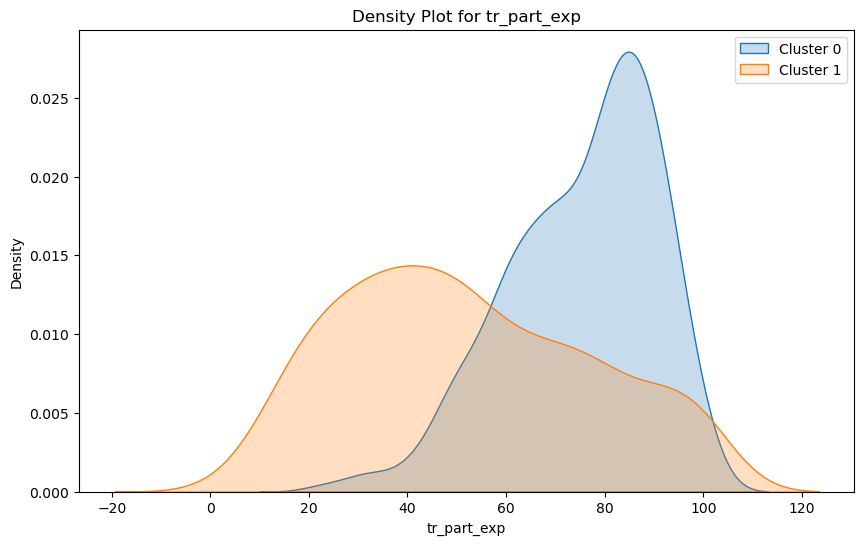

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_X[col], label='Cluster 0', shade=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_Y[col], label='Cluster 1', shade=True)


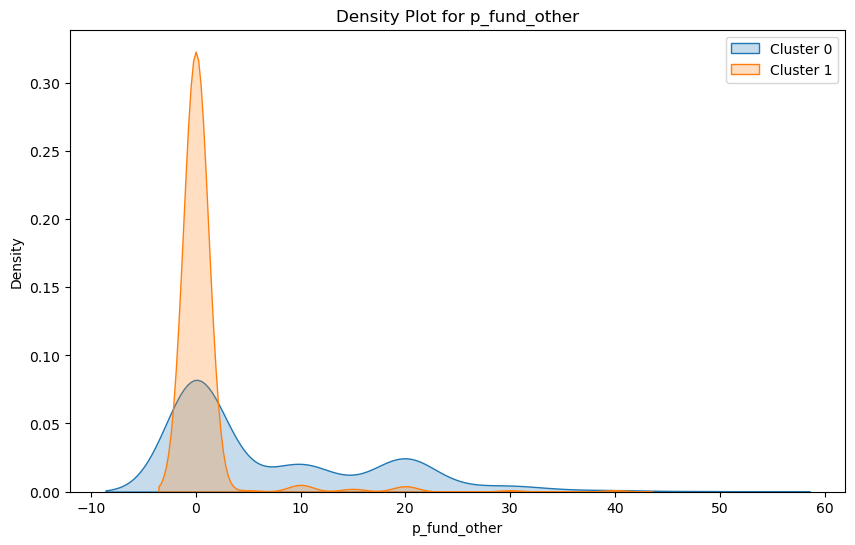

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_X[col], label='Cluster 0', shade=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_Y[col], label='Cluster 1', shade=True)


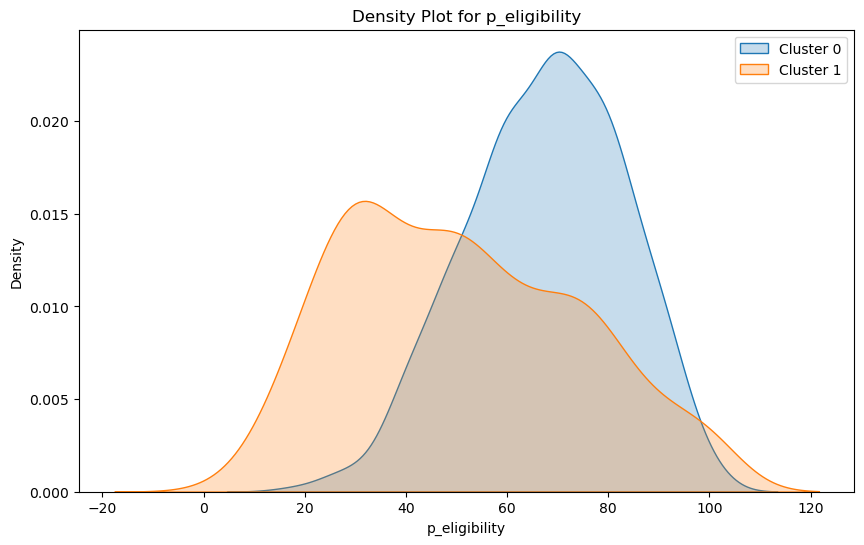

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_X[col], label='Cluster 0', shade=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_Y[col], label='Cluster 1', shade=True)


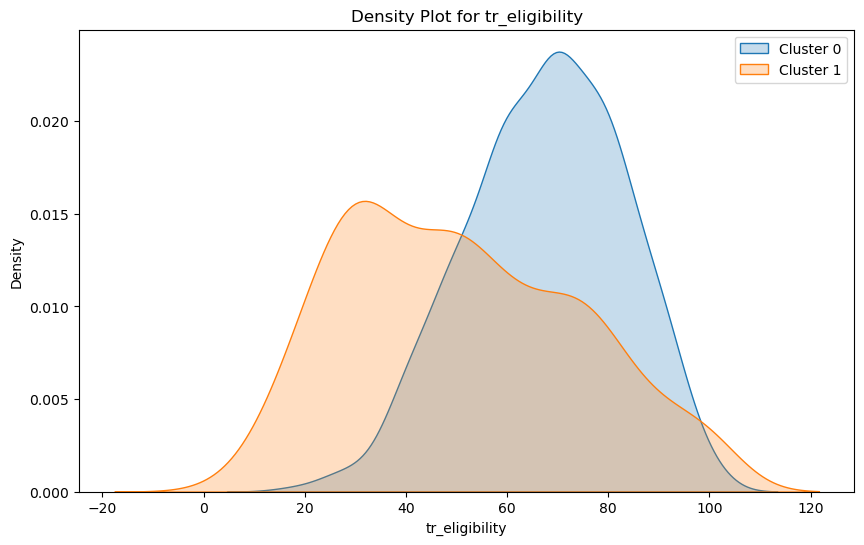

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_X[col], label='Cluster 0', shade=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_Y[col], label='Cluster 1', shade=True)


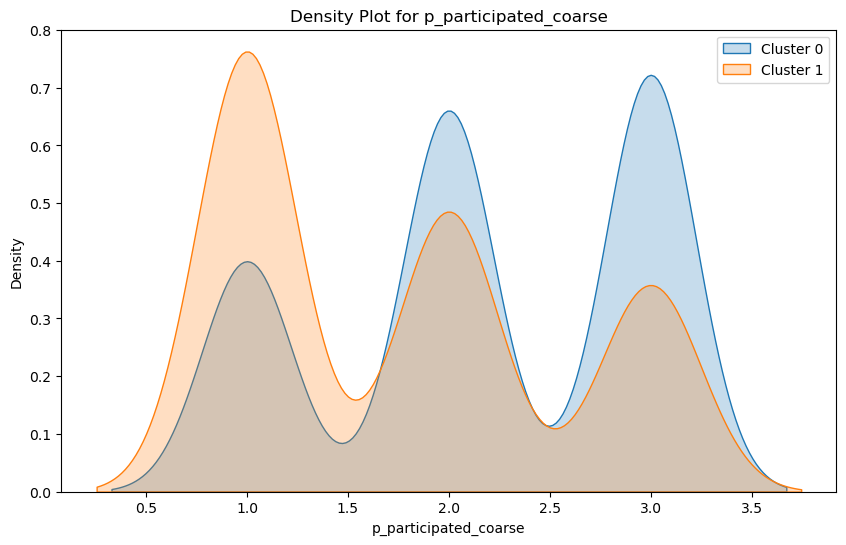

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_X[col], label='Cluster 0', shade=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_Y[col], label='Cluster 1', shade=True)


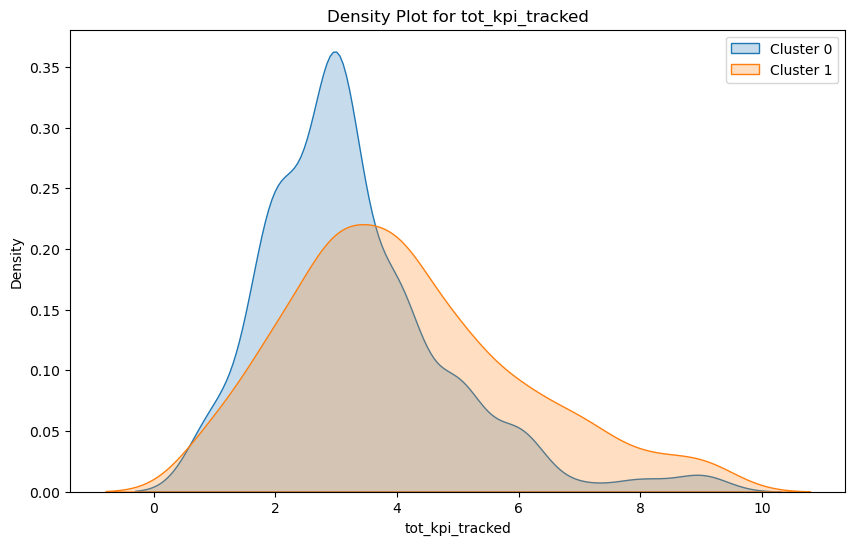

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_X[col], label='Cluster 0', shade=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_Y[col], label='Cluster 1', shade=True)


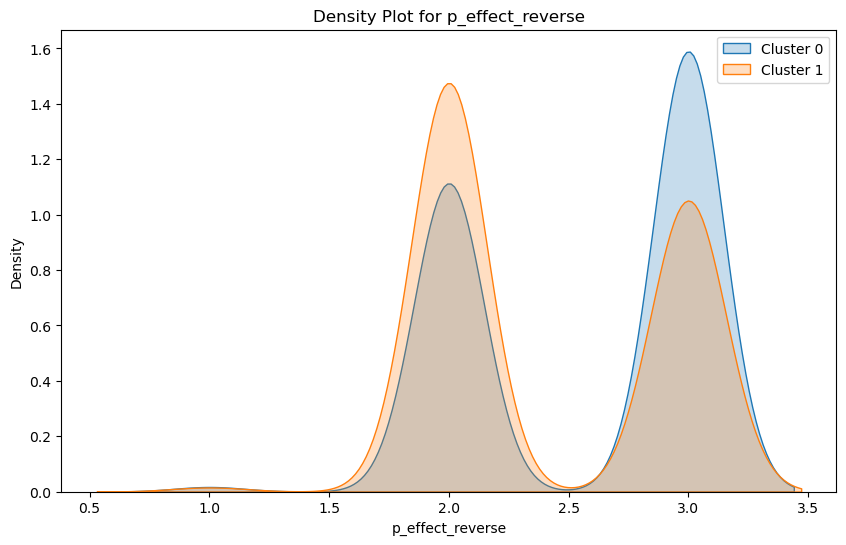

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_X[col], label='Cluster 0', shade=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_Y[col], label='Cluster 1', shade=True)


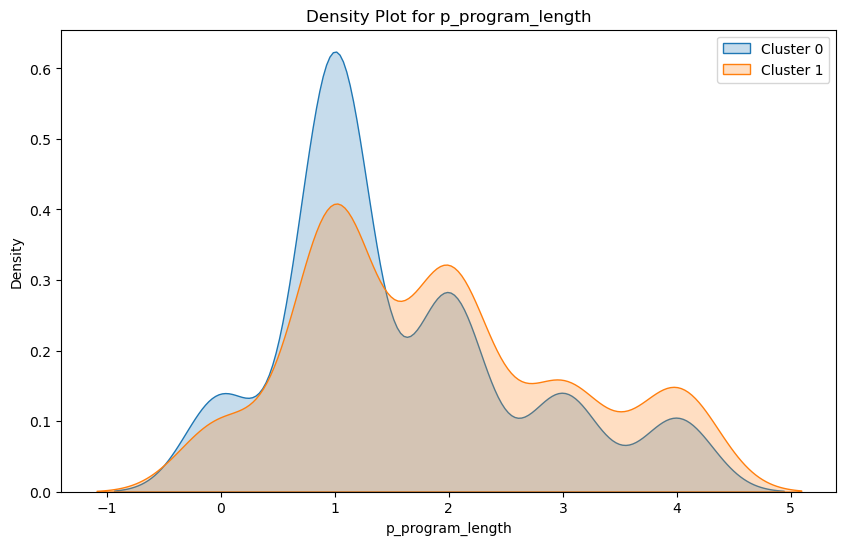

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_X[col], label='Cluster 0', shade=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_Y[col], label='Cluster 1', shade=True)


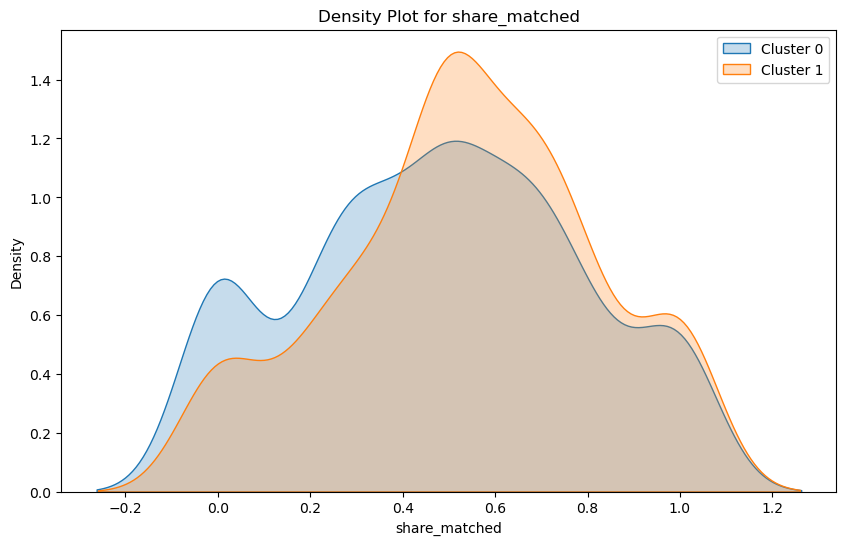

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_X[col], label='Cluster 0', shade=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_Y[col], label='Cluster 1', shade=True)


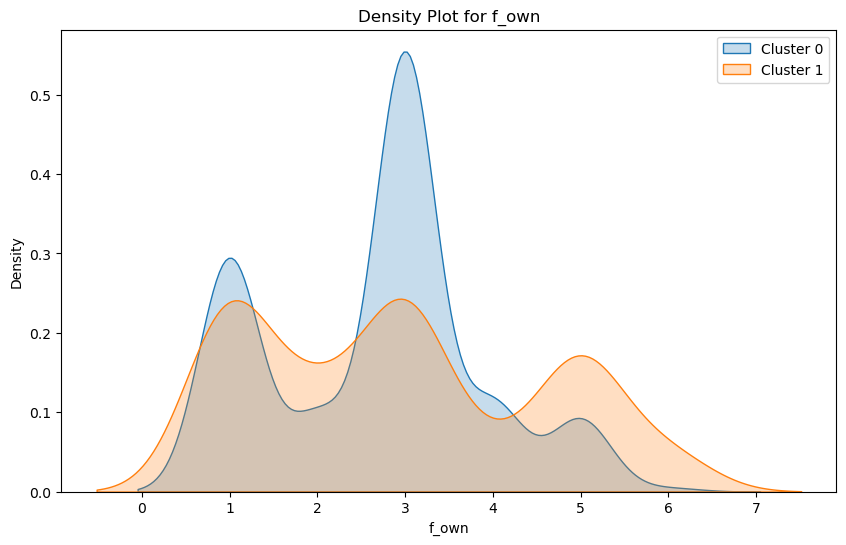

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_X[col], label='Cluster 0', shade=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_Y[col], label='Cluster 1', shade=True)


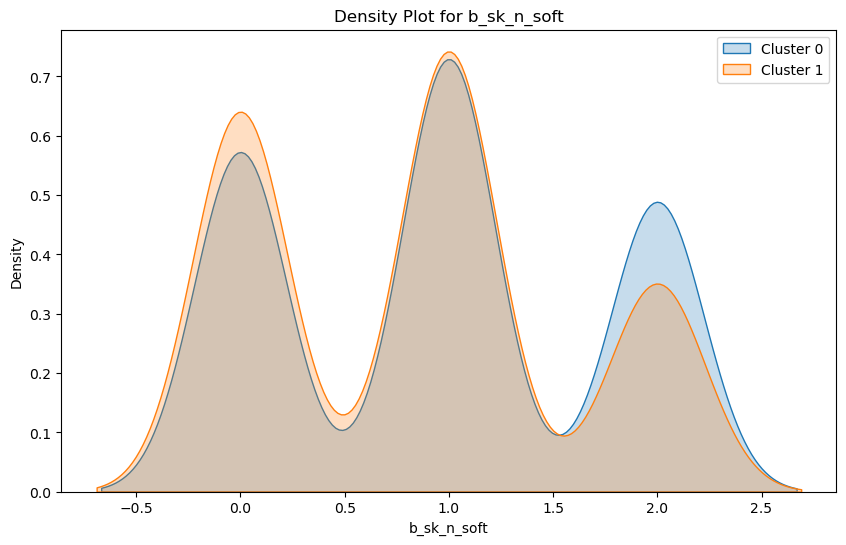

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_X[col], label='Cluster 0', shade=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16652\23479981.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_Y[col], label='Cluster 1', shade=True)


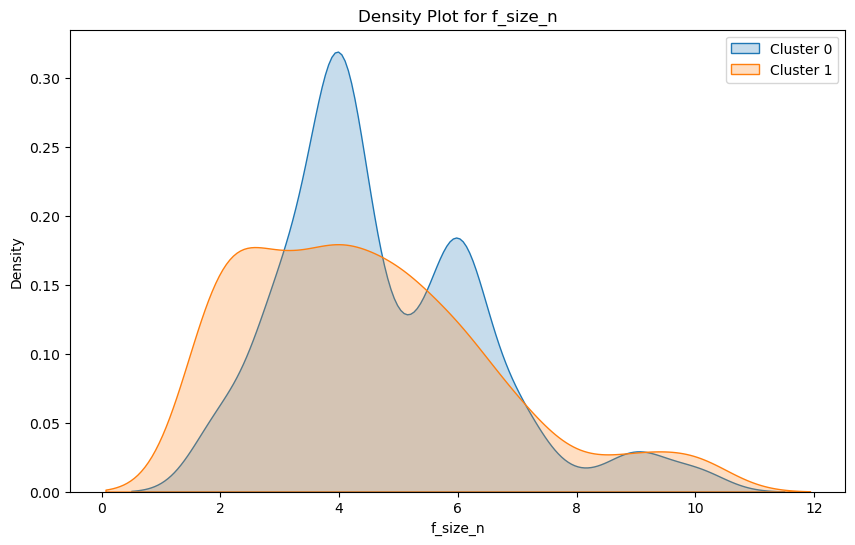

In [15]:
df=relevant_program_data_dummies_clusters
group_X = df[df['KMeans_Cluster'] == 0]
group_Y = df[df['KMeans_Cluster'] == 1]

# Perform t-tests on each column except 'cluster' and sort by p-value
results = []
for col in df.columns:
    if col != 'cluster':
        t_stat, p_value = stats.ttest_ind(group_X[col], group_Y[col], equal_var=False)
        results.append((col, t_stat, p_value))

# Sort by p-value in ascending order and select the top 20
results_sorted = sorted(results, key=lambda x: x[2])[:20]

# Extract the column names of the top 20 significant variables
top_20_significant_cols = [col for col, t_stat, p_value in results_sorted]

# Plot density for top 20 significantly different columns
for col in top_20_significant_cols:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(group_X[col], label='Cluster 0', shade=True)
    sns.kdeplot(group_Y[col], label='Cluster 1', shade=True)
    plt.title(f'Density Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()